<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-libraries" data-toc-modified-id="1.-Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Import libraries</a></span></li><li><span><a href="#2.-Import-clean-data" data-toc-modified-id="2.-Import-clean-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Import clean data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#3.-Data-distribution-and-outliers-(numerical)" data-toc-modified-id="3.-Data-distribution-and-outliers-(numerical)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3. Data distribution and outliers (numerical)</a></span><ul class="toc-item"><li><span><a href="#3.1.-Normal-distribution" data-toc-modified-id="3.1.-Normal-distribution-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>3.1. Normal distribution</a></span></li><li><span><a href="#3.2.-Dealing-with-outliers" data-toc-modified-id="3.2.-Dealing-with-outliers-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>3.2. Dealing with outliers</a></span></li></ul></li><li><span><a href="#3.3-Data-distribution-(categorical)" data-toc-modified-id="3.3-Data-distribution-(categorical)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.3 Data distribution (categorical)</a></span></li><li><span><a href="#Data-correlation" data-toc-modified-id="Data-correlation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data correlation</a></span><ul class="toc-item"><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Numerical variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#ChiSquare-test" data-toc-modified-id="ChiSquare-test-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ChiSquare test</a></span></li><li><span><a href="#Enconding-categorical-variables" data-toc-modified-id="Enconding-categorical-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Enconding categorical variables</a></span><ul class="toc-item"><li><span><a href="#Age" data-toc-modified-id="Age-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Experience-Programming" data-toc-modified-id="Experience-Programming-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Experience Programming</a></span></li></ul></li></ul></li></ul></div>

## 1. Import libraries

In [209]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import plotly.express as px
from scipy.stats import chi2_contingency

## 2. Import clean data

In [210]:
data = pd.read_csv('data_clean_v1.csv')

In [211]:
data.shape

(14375, 18)

In [212]:
data.head()

Unnamed: 0    age gender    country          education  \
0           1  50-54    Man      India  Bachelor’s degree   
1           2  50-54    Man  Indonesia    Master’s degree   
2           3  22-24    Man   Pakistan    Master’s degree   
3           4  45-49    Man     Mexico    Doctoral degree   
4           5  45-49    Man      India    Doctoral degree   

                      role experience_prog  programming_lang_c  experience_ml  \
0                    Other      5-10 years                   2     5-10 years   
1  Program/Project Manager       20+ years                   4   Under 1 year   
2        Software Engineer       1-3 years                   3  No experience   
3       Research Scientist       20+ years                   1     5-10 years   
4                    Other       < 1 years                   3    10-20 years   

                    industry          company_size team_size       salary  \
0  Manufacturing/Fabrication      50-249 employees       3-4  25000-29999   
1  Manufacturing/Fabrication  1000-9,999 employees       1-2  60000-69999   
2        Academics/Education  1000-9,999 employees         0        0-999   
3        Academics/Education  1000-9,999 employees         0  30000-39999   
4        Academics/Education      50-249 employees       5-9  30000-39999   

  country_group company_size_g team_size_g  salary_avg      role_group  
0         India         Medium       Small     27500.0           Other  
1         Other          Large       Small     65000.0    Data Analyst  
2         Other          Large     No team       500.0   Data Engineer  
3         Other          Large     No team     35000.0  Data Scientist  
4         India         Medium       Small     35000.0           Other

In [213]:
data = data.drop(['Unnamed: 0'], axis=1)

In [214]:
data.dtypes

age                    object
gender                 object
country                object
education              object
role                   object
experience_prog        object
programming_lang_c      int64
experience_ml          object
industry               object
company_size           object
team_size              object
salary                 object
country_group          object
company_size_g         object
team_size_g            object
salary_avg            float64
role_group             object
dtype: object

I will create a dataframe only with country_group Europe, another one with country_group USA and one for India, as I want to predict salaries so I've decided to do it with different regions.

In [215]:
data_eu = data[data['country_group'] == 'Europe']

## EDA

### 3. Data distribution and outliers (numerical)

In [216]:
def dist_boxplot_num(data, skip_columns=[]):
    for col in data.select_dtypes(np.number):
        if col not in skip_columns:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            sns.distplot(data[col], ax=axes[0])
            sns.boxplot(data[col], ax=axes[1])
            plt.show()

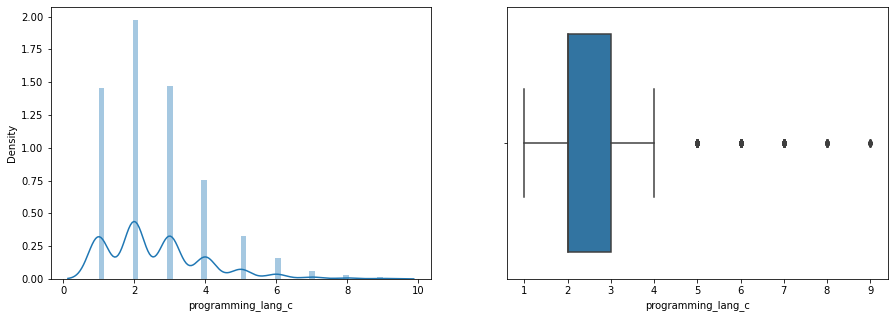

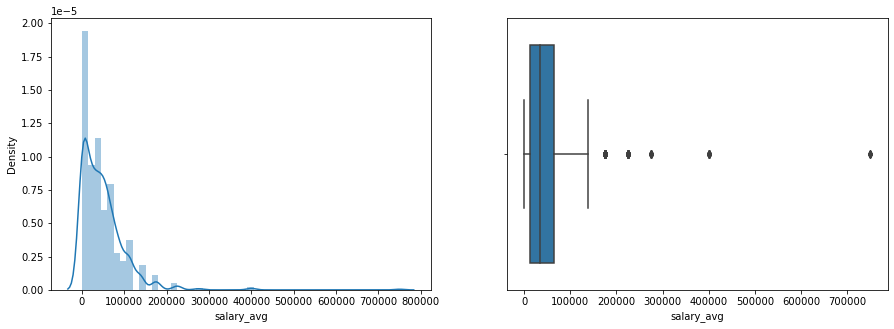

In [217]:
dist_boxplot_num(data_eu)

#### 3.1. Normal distribution

I want to apply boxcox tranformation to columns salary_average, as it is the one with bigger numbers

In [218]:
def boxcox_transform(data, skip_columns=[]):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        if column not in skip_columns:
# since i know any columns should take negative numbers, to avoid -inf in df
            data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
            data[column] = data[column].fillna(data[column].mean())
            transformed_data, ci = stats.boxcox(data[column])
            data[column] = transformed_data
            _ci[column] = [ci] 
        return data, _ci

In [219]:
data, _ci = boxcox_transform(data_eu, skip_columns = ['programming_lang_c'])
data

age gender   country               education  \
10     35-39    Man    Greece         Doctoral degree   
11     50-54    Man   Belgium       Bachelor’s degree   
17     25-29  Woman    Poland         Master’s degree   
24     25-29    Man     Italy         Master’s degree   
35     35-39  Woman    Russia  I prefer not to answer   
...      ...    ...       ...                     ...   
14345  30-34    Man  Portugal         Master’s degree   
14348  25-29    Man   Germany         Master’s degree   
14358  40-44    Man    Russia  I prefer not to answer   
14365  35-39    Man    Russia       Bachelor’s degree   
14369  35-39    Man     Italy       Bachelor’s degree   

                            role experience_prog  programming_lang_c  \
10            Research Scientist     10-20 years                   4   
11                  Data Analyst       20+ years                   2   
17     Machine Learning Engineer       3-5 years                   2   
24                         Other       1-3 years                   2   
35                Data Scientist       1-3 years                   2   
...                          ...             ...                 ...   
14345              Data Engineer     10-20 years                   4   
14348             Data Scientist       1-3 years                   2   
14358              Data Engineer       < 1 years                   2   
14365          Software Engineer       3-5 years                   4   
14369    Program/Project Manager       3-5 years                   2   

       experience_ml                   industry              company_size  \
10         4-5 years        Academics/Education          50-249 employees   
11         1-2 years              Energy/Mining      1000-9,999 employees   
17      Under 1 year       Computers/Technology            0-49 employees   
24      Under 1 year              Energy/Mining            0-49 employees   
35     No experience        Academics/Education      1000-9,999 employees   
...              ...                        ...                       ...   
14345     5-10 years  Manufacturing/Fabrication      1000-9,999 employees   
14348      1-2 years       Computers/Technology  10,000 or more employees   
14358   Under 1 year       Computers/Technology  10,000 or more employees   
14365  No experience  Insurance/Risk Assessment         250-999 employees   
14369      1-2 years       Computers/Technology      1000-9,999 employees   

      team_size       salary country_group company_size_g team_size_g  \
10          5-9  10000-14999        Europe         Medium       Small   
11          5-9    2000-2999        Europe          Large       Small   
17          3-4  25000-29999        Europe          Small       Small   
24          1-2  30000-39999        Europe          Small       Small   
35          3-4        0-999        Europe          Large       Small   
...         ...          ...           ...            ...         ...   
14345       20+  70000-79999        Europe          Large       Large   
14348       20+  60000-69999        Europe          Large       Large   
14358       20+        0-999        Europe          Large       Large   
14365     10-14  20000-24999        Europe          Large      Medium   
14369       1-2  60000-69999        Europe          Large       Small   

       salary_avg      role_group  
10        12500.0  Data Scientist  
11         2500.0    Data Analyst  
17        27500.0   Data Engineer  
24        35000.0           Other  
35          500.0  Data Scientist  
...           ...             ...  
14345     75000.0   Data Engineer  
14348     65000.0  Data Scientist  
14358       500.0   Data Engineer  
14365     22500.0   Data Engineer  
14369     65000.0    Data Analyst  

[2910 rows x 17 columns]

#### 3.2. Dealing with outliers

I will remove the outliers from columns salary_avg and programming_lang_c, as we can some outliers in the boxplots

In [220]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
        return data

In [221]:
data = remove_outliers(data_eu, threshold=1.5, skip_columns=['programming_lang_c'])

For column programming_lang_c I will drop the rows that have less than 100 answers

In [222]:
data_eu['programming_lang_c'].value_counts()

2    919
3    685
1    676
4    351
5    153
6     75
7     29
8     15
9      7
Name: programming_lang_c, dtype: int64

In [223]:
data = data[data['programming_lang_c'] < 8]

In [224]:
data['programming_lang_c'].value_counts()

2    919
3    685
1    676
4    351
5    153
6     75
7     29
Name: programming_lang_c, dtype: int64

### 3.3 Data distribution (categorical)

In [225]:
def dist_cat(df):
    for col in df.select_dtypes(np.object):
        order = df[col].value_counts(ascending=True).index
        fig, axes = plt.subplots(1, figsize=(22, 12))
        sns.countplot(y=df[col], data=df, order=order)
        plt.show()

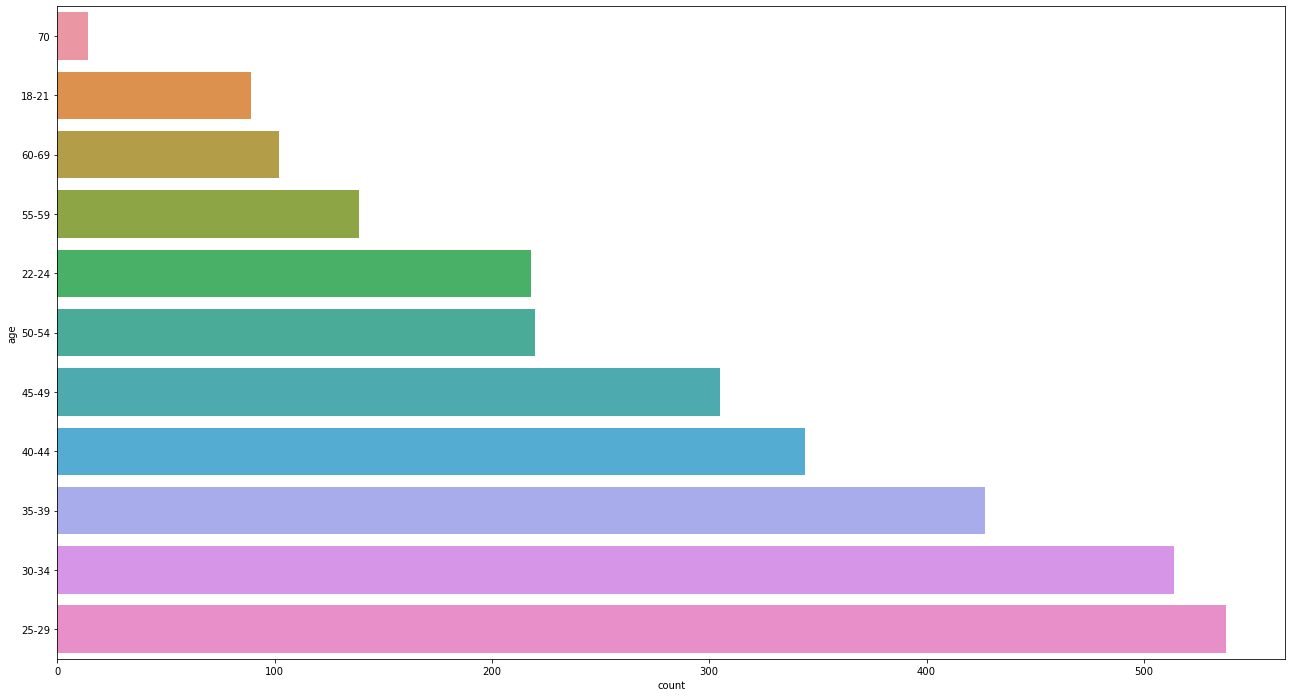

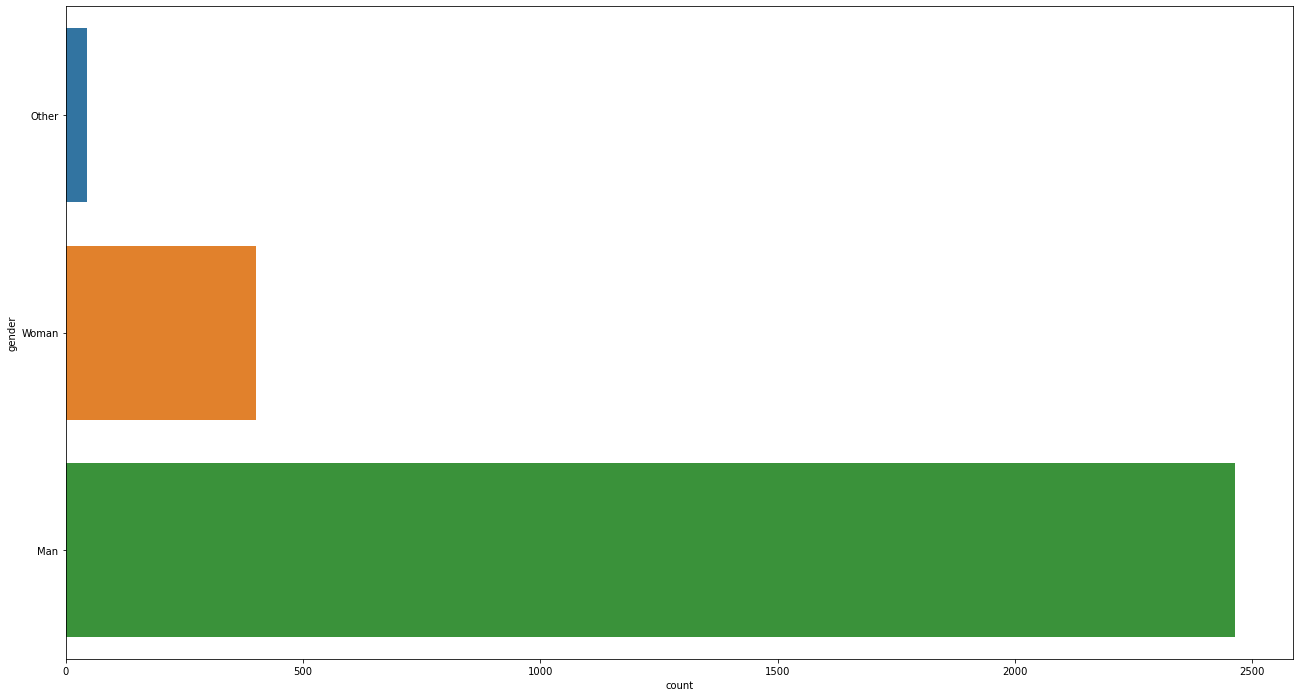

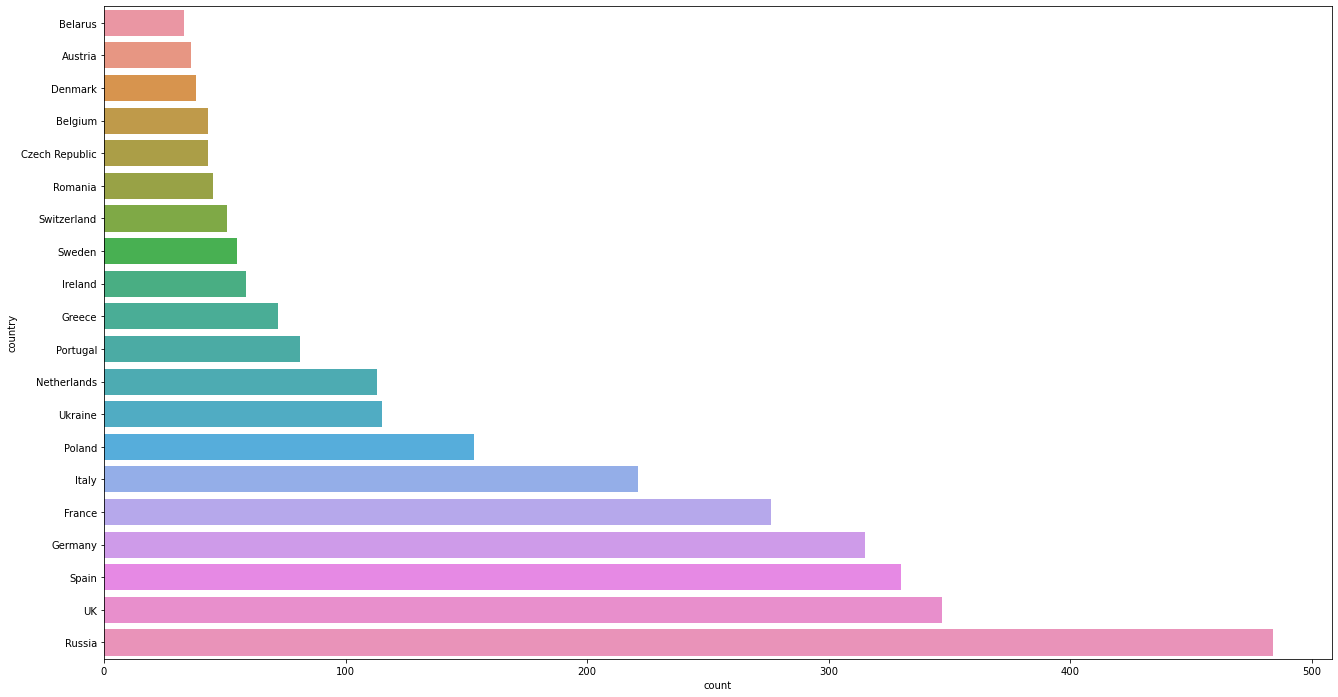

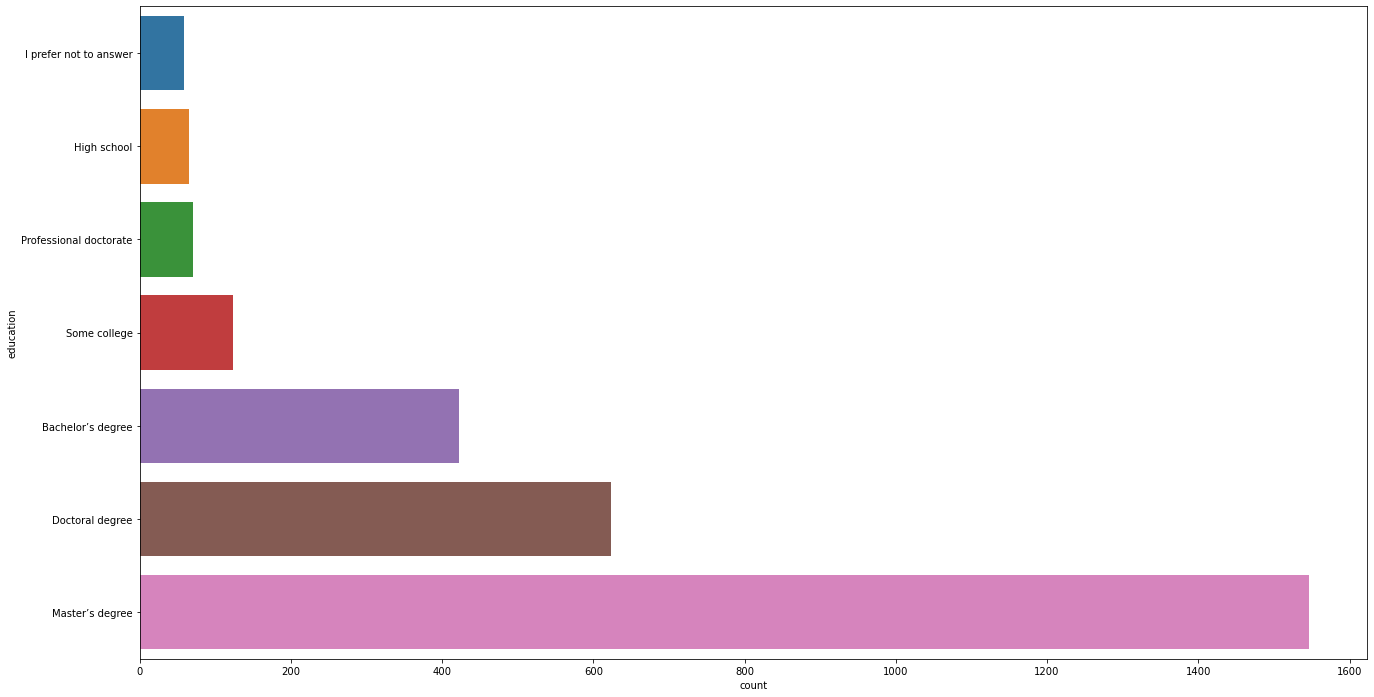

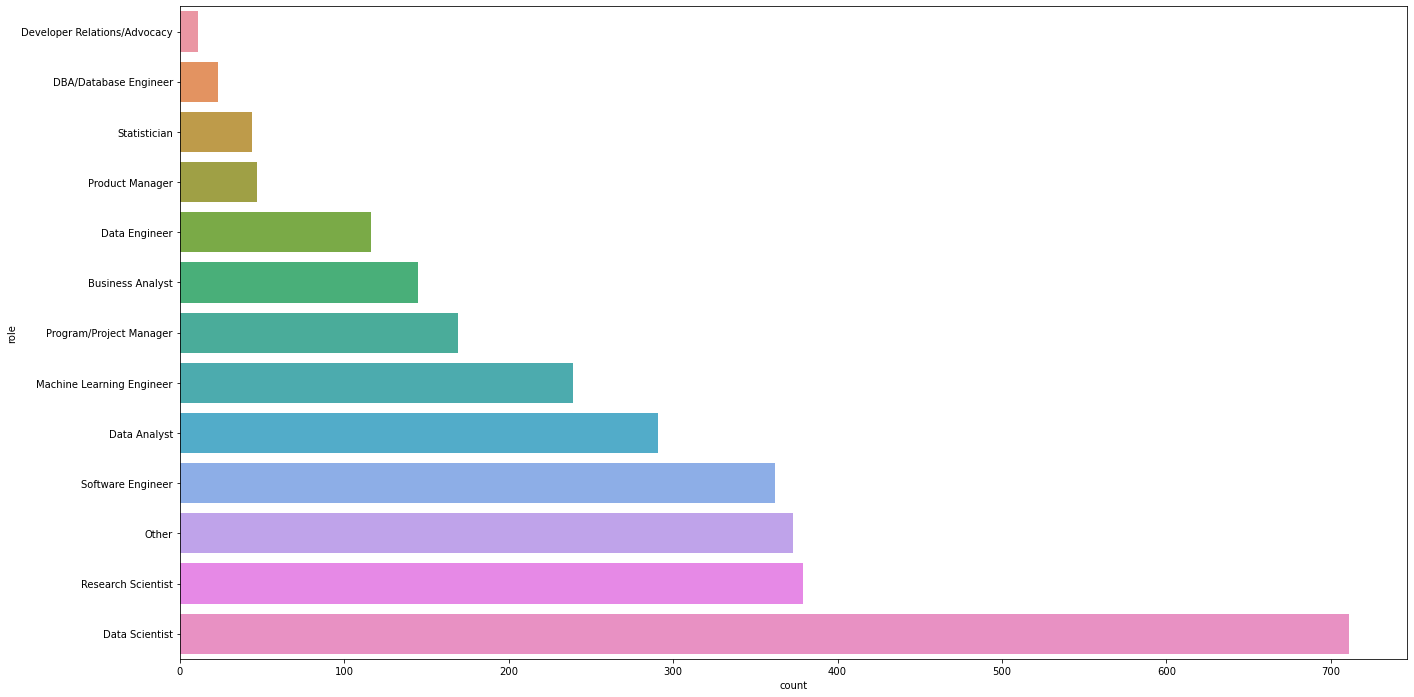

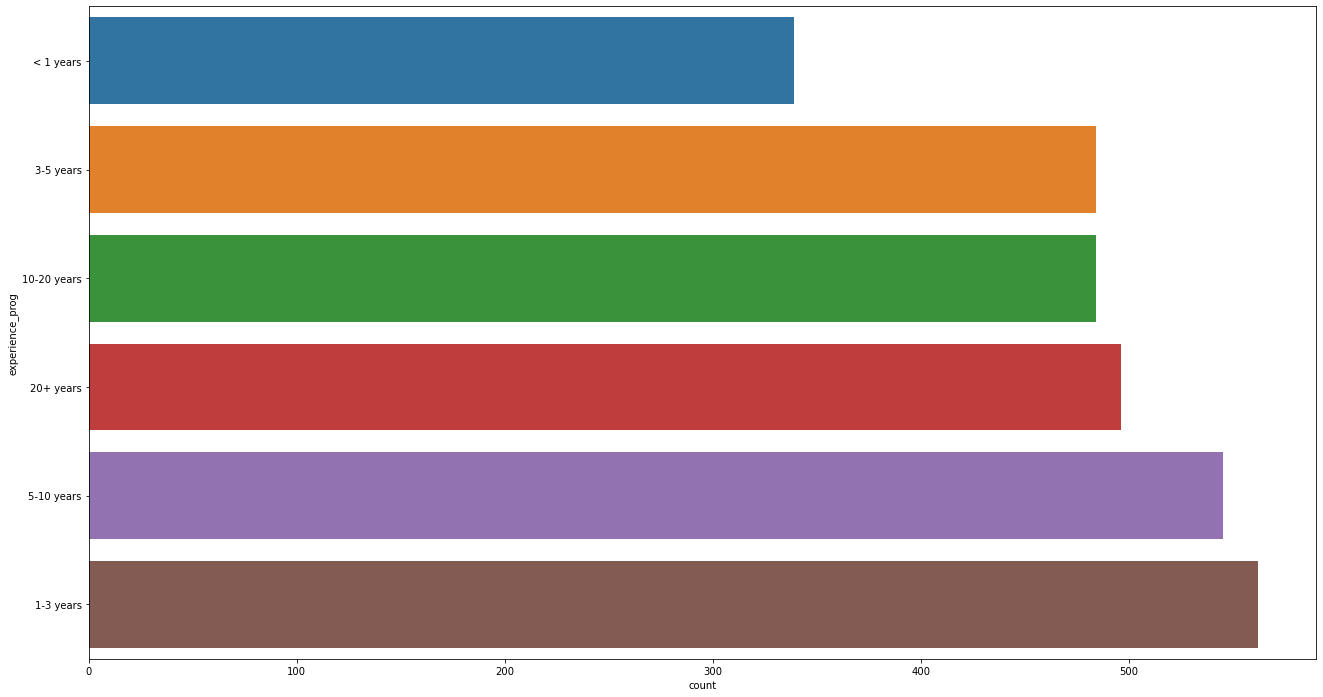

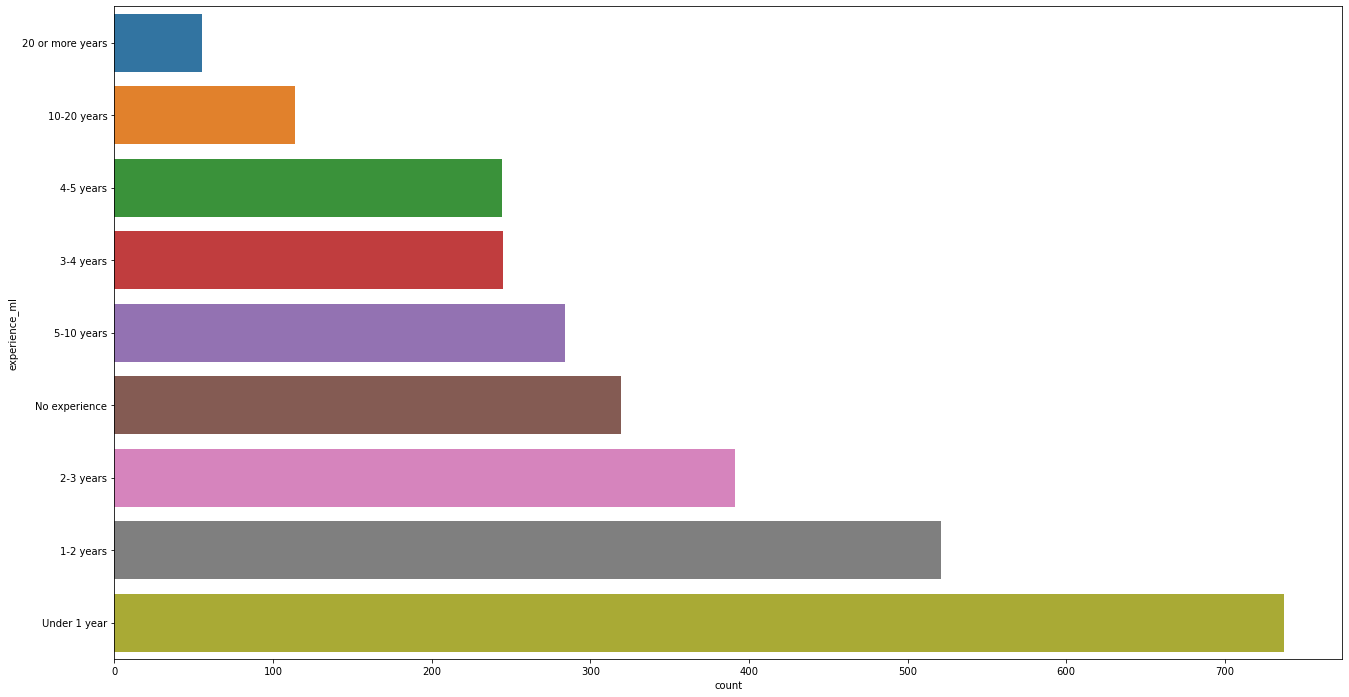

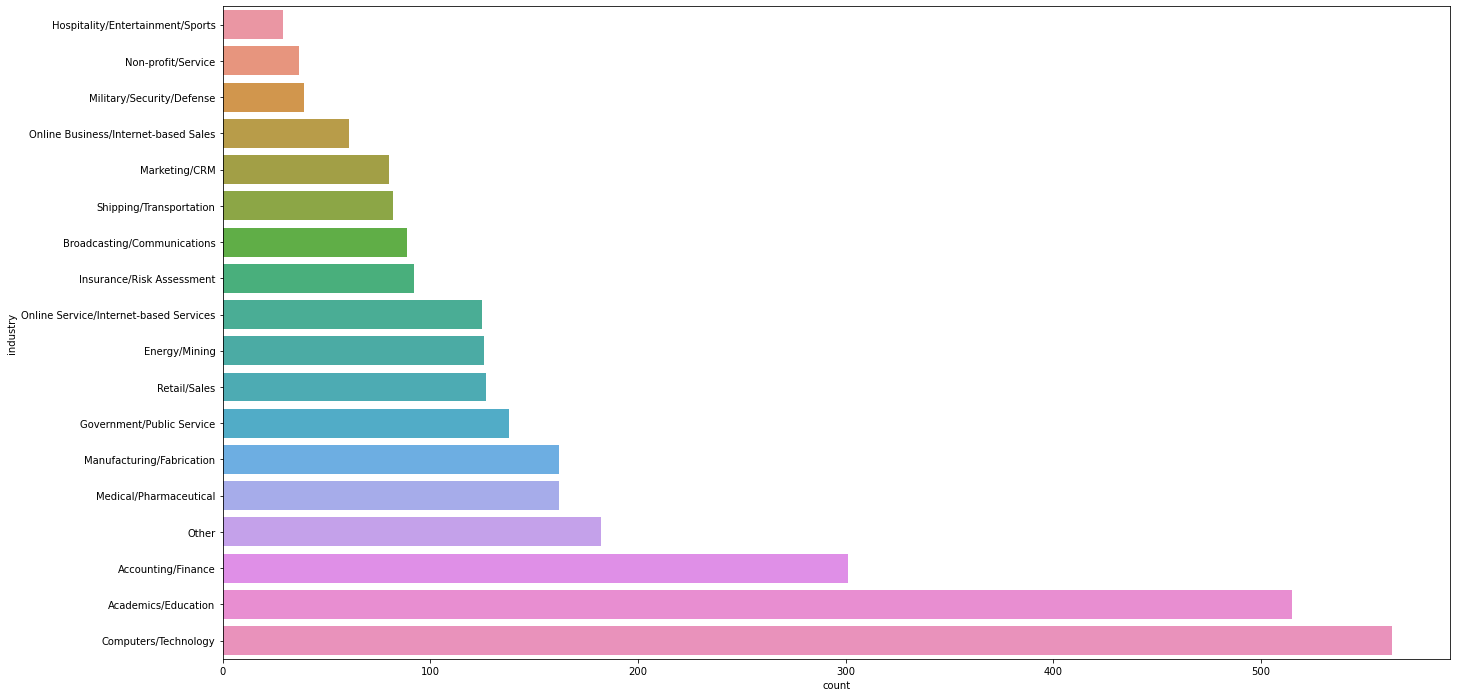

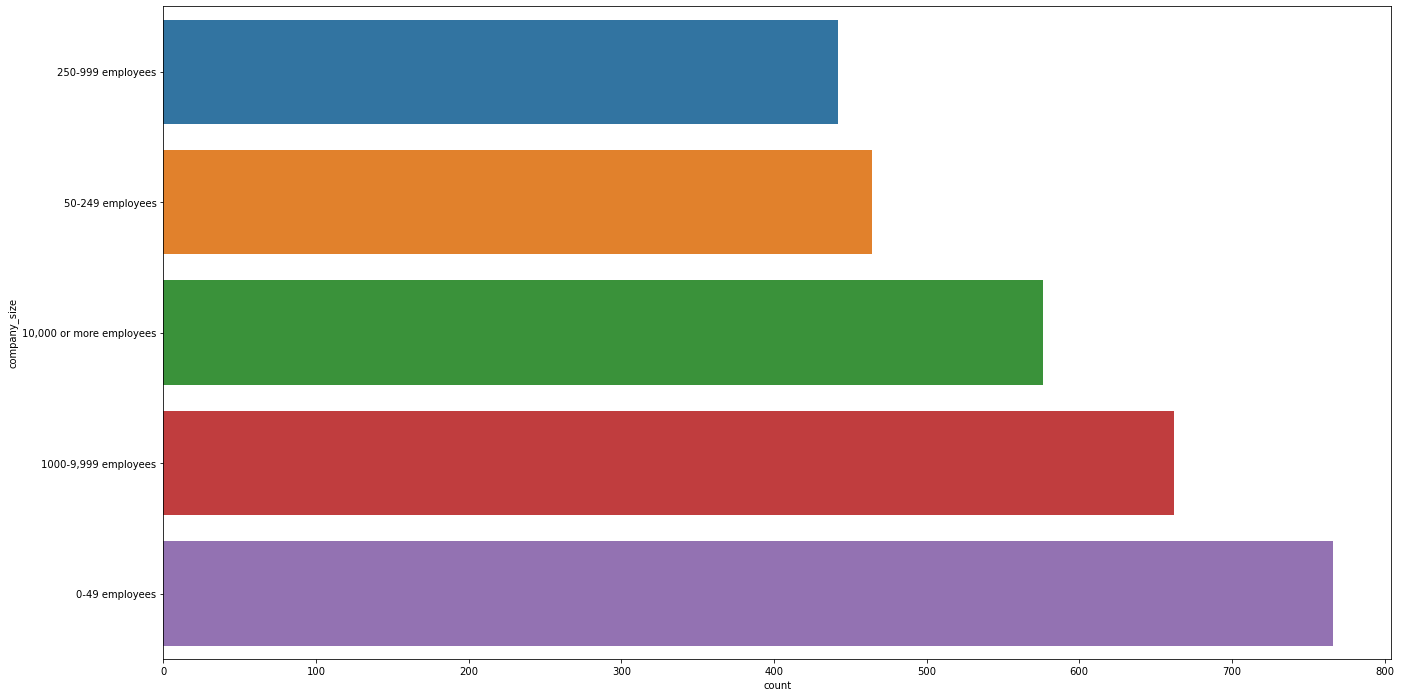

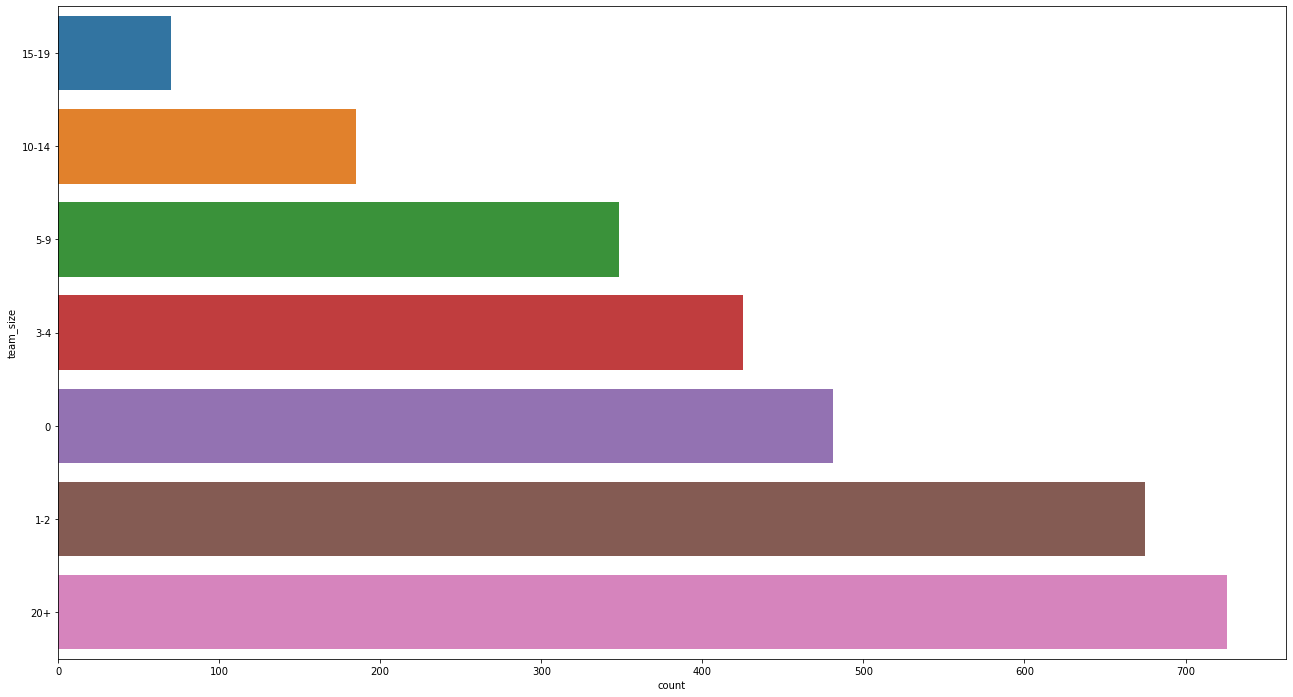

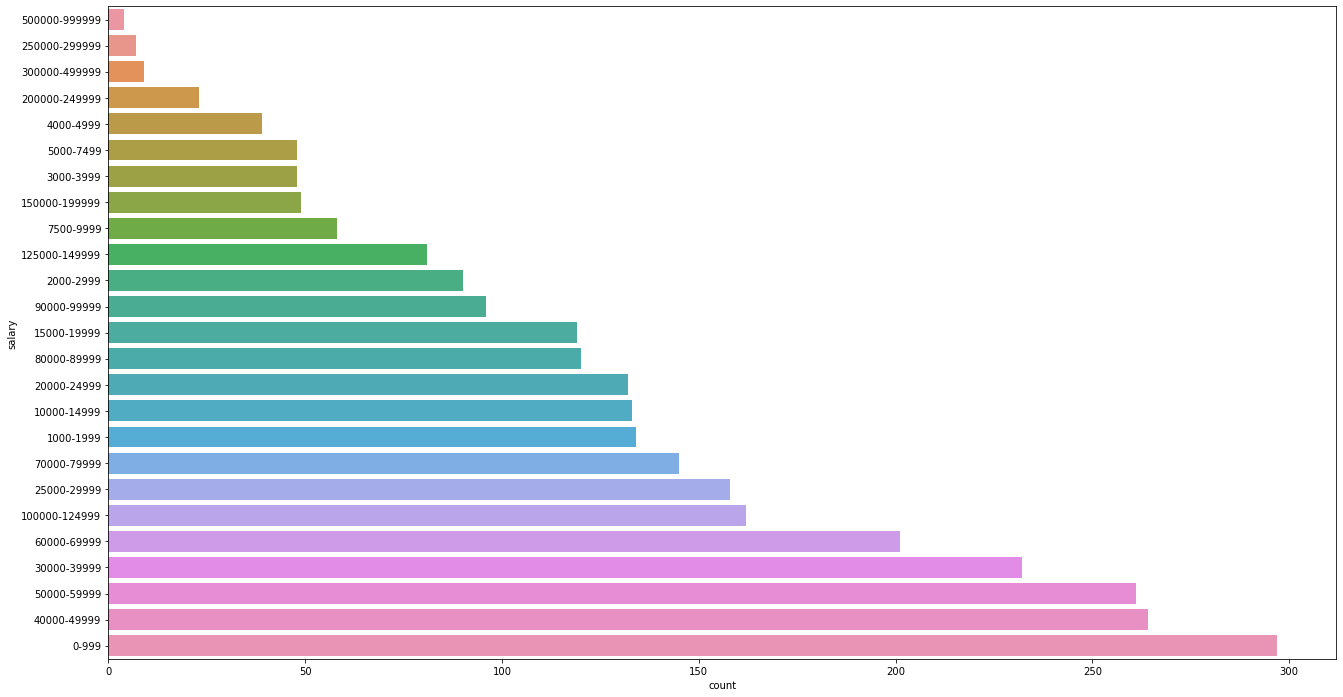

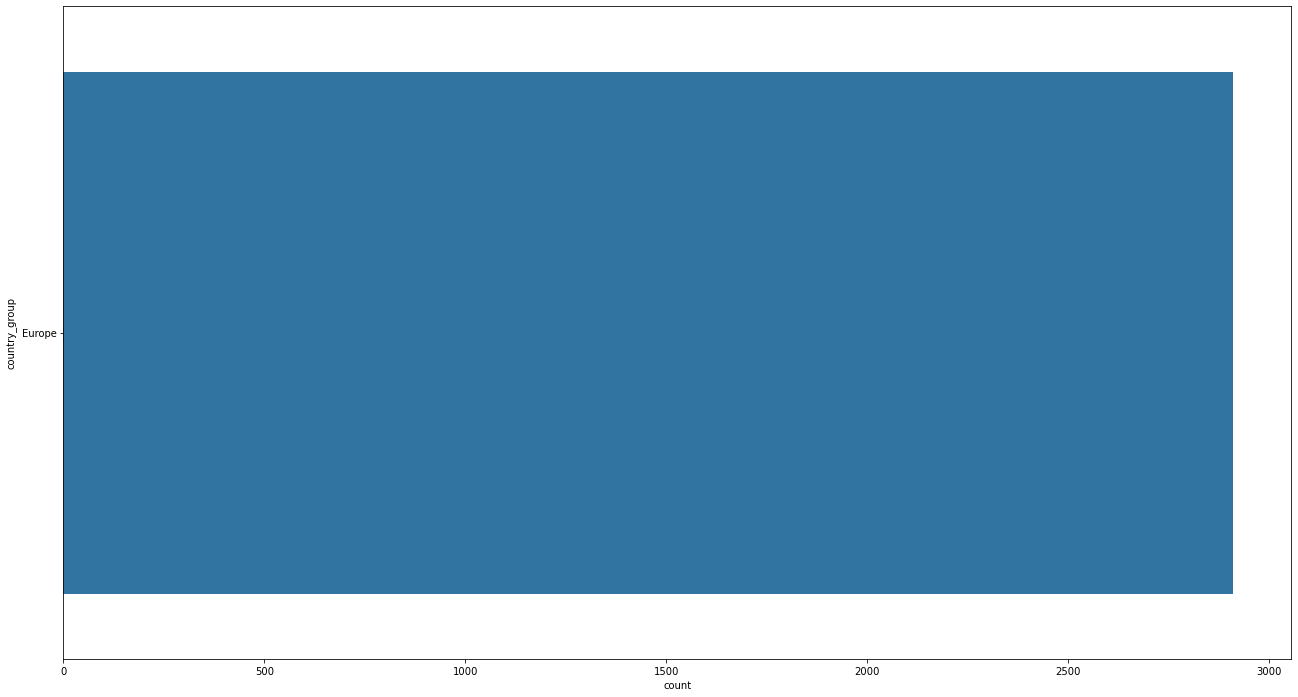

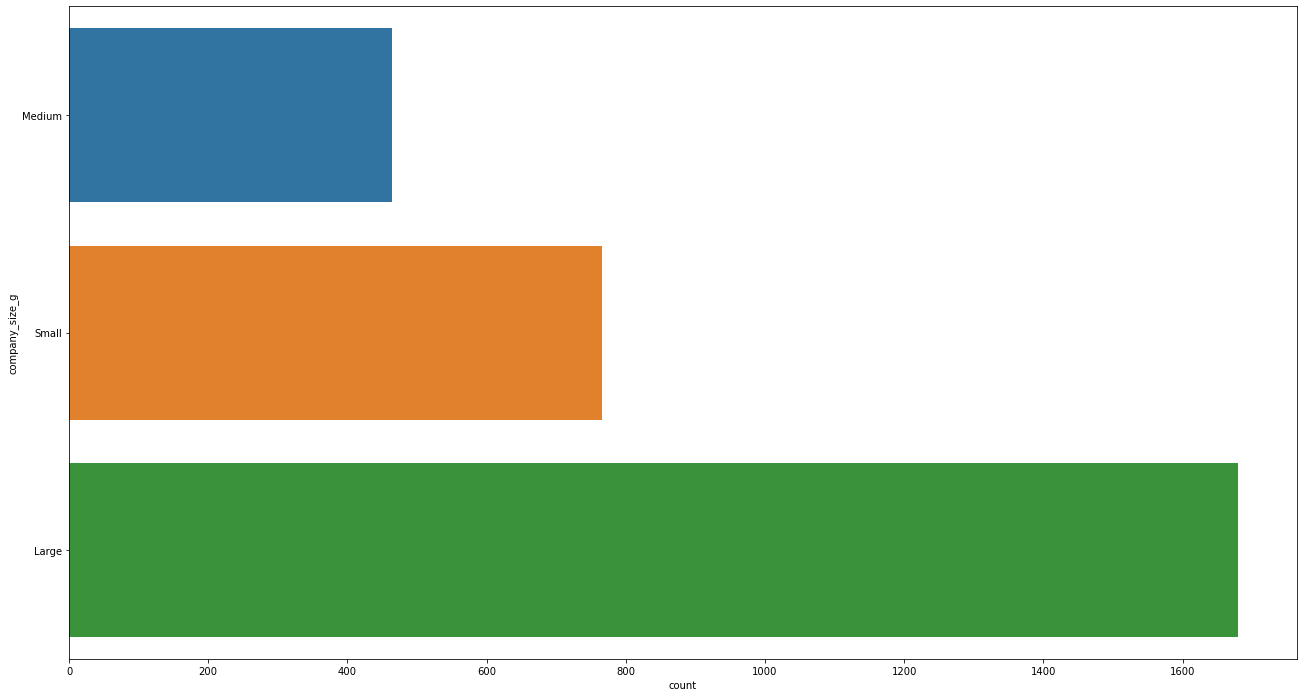

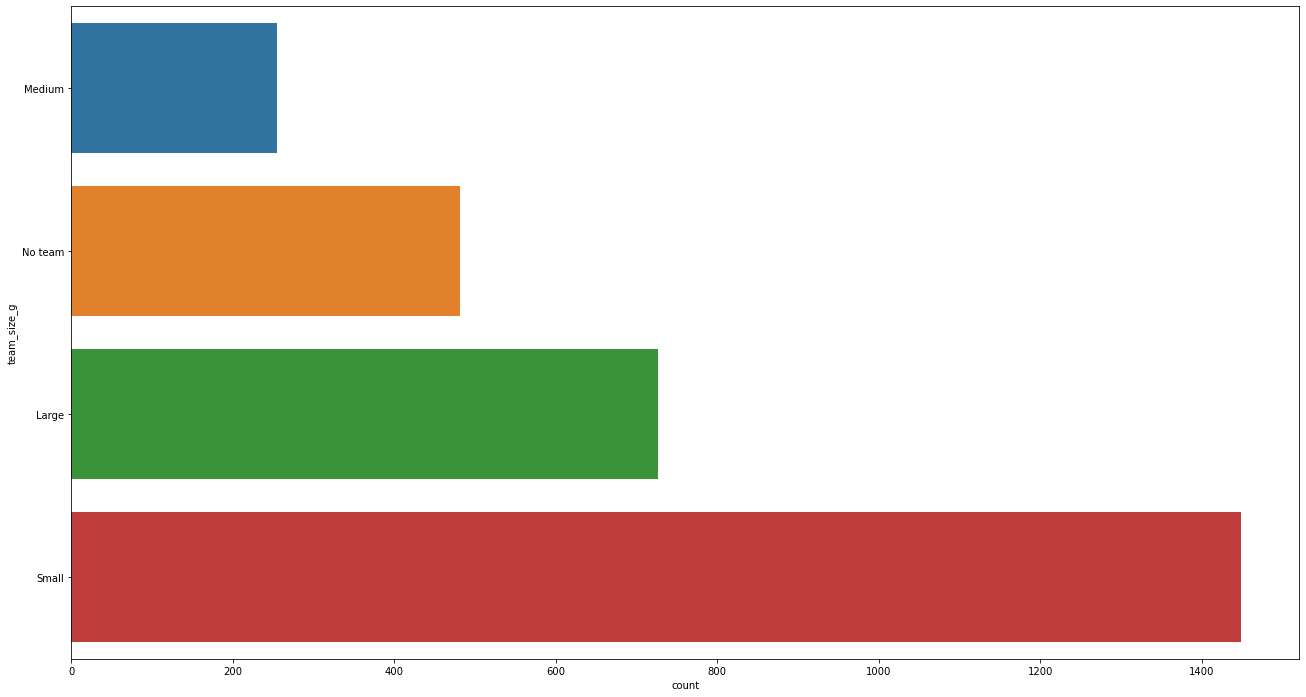

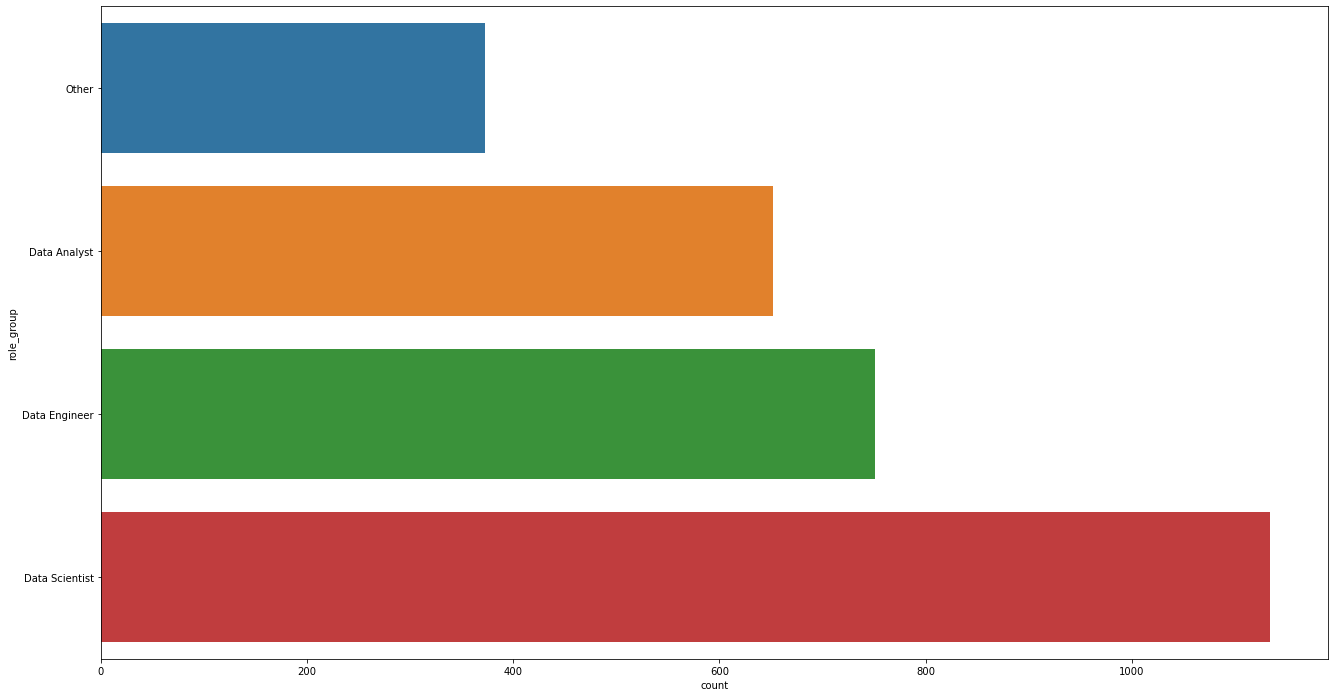

In [226]:
dist_cat(data_eu)

In [164]:
data_eu = data[data['country_group'] == 'Europe']

In [165]:
data_eu.shape

(2903, 17)

### Data correlation

#### Numerical variables

In [227]:
corr_df_model = data_eu.select_dtypes([np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

programming_lang_c  salary_avg
programming_lang_c            1.000000    0.078317
salary_avg                    0.078317    1.000000

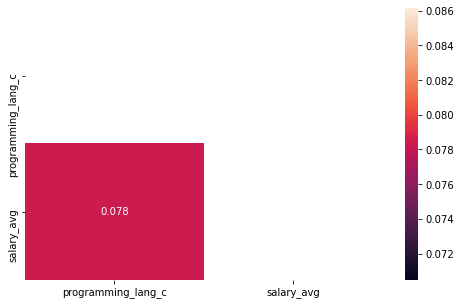

In [228]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

I have decided not to drop any of these columns as correlation is not high.

#### Categorical variables

I will apply the same correlation method (spearman) to the categorical variables and will use factorize This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [ ]:
I will alao

In [229]:
data_cat = data_eu.select_dtypes(np.object)
data_num = data_eu.select_dtypes(np.number)

In [230]:
corr_mat = data_cat.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')

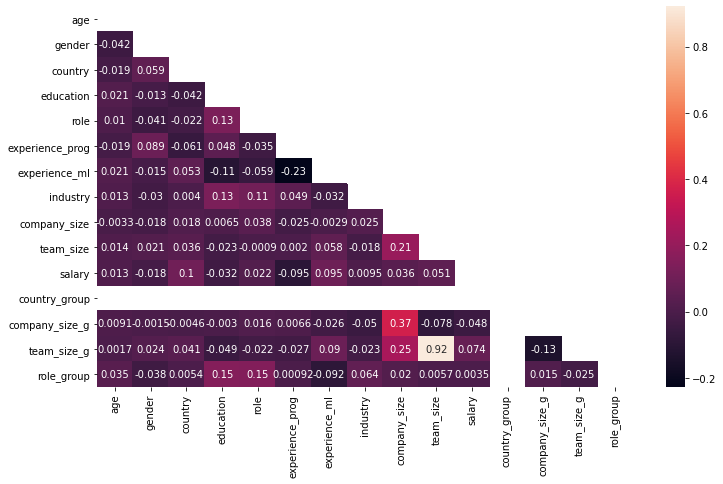

In [231]:
mask = np.zeros_like(corr_mat)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap((corr_mat), mask=mask, annot=True)
plt.show()

I have decided not to drop any of these columns as correlation is not high.

### ChiSquare test

H0 (Null Hypothesis) - assumes that there is no association between the two variables.

Ha (Alternate Hypothesis) - assumes that there is an association between the two variables.

In [133]:
def col_cat_val(data, columns=[]):
    for i in columns:
        for j in columns:
            if i != j:
                data_crosstab = pd.crosstab(data[i], data[j], margins = False)
                print (i,"vs", j)
                print (chi2_contingency(data_crosstab, correction=False), '\n')

In [134]:
col_cat_val(data, columns= data.select_dtypes(np.object))

age vs gender
(39.201412803708024, 0.006293169101615685, 20, array([[7.52959008e+01, 1.41026524e+00, 1.22938340e+01],
       [1.84432656e+02, 3.45435756e+00, 3.01129866e+01],
       [4.55159490e+02, 8.52497416e+00, 7.43155357e+01],
       [4.34854978e+02, 8.14467792e+00, 7.10003445e+01],
       [3.59559077e+02, 6.73441268e+00, 5.87065105e+01],
       [2.90185326e+02, 5.43506717e+00, 4.73796073e+01],
       [2.55498450e+02, 4.78539442e+00, 4.17161557e+01],
       [1.86124699e+02, 3.48604891e+00, 3.03892525e+01],
       [1.16750947e+02, 2.18670341e+00, 1.90623493e+01],
       [8.62941784e+01, 1.61625904e+00, 1.40895625e+01],
       [1.18442990e+01, 2.21839476e-01, 1.93386152e+00]])) 

age vs country
(428.3925634068906, 1.922495538238104e-20, 190, array([[ 1.10368584,  1.01171202,  1.31829142,  1.31829142,  1.16500172,
         8.40027558,  9.59593524,  2.20737168,  1.77816052,  6.77540475,
         3.43368929,  4.69066483,  2.48329315,  1.3796073 , 14.83844299,
        10.11712022,  1.65

age vs company_size
(72.25309717699716, 0.0013350971053039695, 40, array([[ 23.42266621,  17.62831554,  20.2035825 ,  13.52015157,
         14.22528419],
       [ 57.37237341,  43.17946951,  49.4874268 ,  33.11677575,
         34.84395453],
       [141.58870134, 106.56217706, 122.12952118,  81.72855667,
         85.99104375],
       [135.27247675, 101.80847399, 116.68136411,  78.0826731 ,
         82.15501206],
       [111.84981054,  84.18015846,  96.47778161,  64.56252153,
         67.92972787],
       [ 90.26937651,  67.93833965,  77.86324492,  52.10575267,
         54.82328626],
       [ 79.47915949,  59.81743024,  68.55597658,  45.87736824,
         48.27006545],
       [ 57.89872546,  43.57561144,  49.94143989,  33.42059938,
         35.16362384],
       [ 36.31829142,  27.33379263,  31.3269032 ,  20.96383052,
         22.05718223],
       [ 26.84395453,  20.20323803,  23.15466759,  15.49500517,
         16.30313469],
       [  3.68446435,   2.77299346,   3.17809163,   2.12676542,

age vs role_group
(136.29384382391765, 1.697851237035643e-15, 30, array([[ 19.98897692,  22.96279711,  34.67413021,  11.37409576],
       [ 48.96176369,  56.24595246,  84.93213917,  27.86014468],
       [120.83224251, 138.80881846, 209.60316914,  68.75576989],
       [115.4419566 , 132.61660351, 200.25284189,  65.688598  ],
       [ 95.45297968, 109.65380641, 165.57871168,  54.31450224],
       [ 77.03616948,  88.49707199, 133.63176025,  43.83499828],
       [ 67.82776438,  77.91870479, 117.65828453,  38.5952463 ],
       [ 49.41095419,  56.76197038,  85.7113331 ,  28.11574234],
       [ 30.99414399,  35.60523596,  53.76438167,  17.63623837],
       [ 22.90871512,  26.31691354,  39.7388908 ,  13.03548054],
       [  3.14433345,   3.61212539,   5.45435756,   1.7891836 ]])) 

gender vs age
(39.20141280370802, 0.006293169101615709, 20, array([[7.52959008e+01, 1.84432656e+02, 4.55159490e+02, 4.34854978e+02,
        3.59559077e+02, 2.90185326e+02, 2.55498450e+02, 1.86124699e+02,
        1.1

country vs gender
(93.08752278370629, 1.6040633695997805e-06, 38, array([[ 30.45676886,   0.57044437,   4.97278677],
       [ 27.91870479,   0.52290734,   4.55838787],
       [ 36.37891836,   0.68136411,   5.93971753],
       [ 36.37891836,   0.68136411,   5.93971753],
       [ 32.14881157,   0.60213572,   5.2490527 ],
       [231.80985188,   4.34171547,  37.84843266],
       [264.80468481,   4.95969687,  43.23561833],
       [ 60.91353772,   1.14088874,   9.94557354],
       [ 49.06923872,   0.91904926,   8.01171202],
       [186.97071994,   3.50189459,  30.52738546],
       [ 94.75439201,   1.77471581,  15.47089218],
       [129.44126765,   2.42438856,  21.13434378],
       [ 68.52772993,   1.28349983,  11.18877024],
       [ 38.07096107,   0.71305546,   6.21598347],
       [409.47433689,   7.66930761,  66.85635549],
       [279.18704788,   5.22907337,  45.58387875],
       [ 45.68515329,   0.85566655,   7.45918016],
       [ 43.14708922,   0.80812952,   7.04478126],
       [293.5694

country vs industry
(469.1665543844234, 1.8487561259152272e-07, 323, array([[ 6.37409576,  3.73269032,  1.10368584,  6.96934206,  1.56252153,
         1.7113331 ,  0.34722701,  1.14088874,  1.99655529,  0.99207716,
         1.99655529,  0.48363762,  0.44643472,  0.75645884,  1.55012056,
         2.25697554,  1.57492249,  1.00447813],
       [ 5.84292112,  3.42163279,  1.01171202,  6.38856355,  1.4323114 ,
         1.56872201,  0.31829142,  1.04581467,  1.83017568,  0.90940406,
         1.83017568,  0.44333448,  0.40923183,  0.6934206 ,  1.42094385,
         2.06889425,  1.44367895,  0.92077162],
       [ 7.61350327,  4.45849122,  1.31829142,  8.3244919 ,  1.86634516,
         2.04409232,  0.41474337,  1.36272821,  2.38477437,  1.18498105,
         2.38477437,  0.57767826,  0.53324147,  0.90354805,  1.8515329 ,
         2.6958319 ,  1.88115742,  1.19979332],
       [ 7.61350327,  4.45849122,  1.31829142,  8.3244919 ,  1.86634516,
         2.04409232,  0.41474337,  1.36272821,  2.3847743

(1741.063277732452, 3.8432725670467537e-149, 456, array([[3.68308646e+00, 1.66172925e+00, 1.64932828e+00, 1.98415432e+00,
        1.00447813e+00, 1.47571478e+00, 6.07647261e-01, 1.11608681e+00,
        1.62452635e+00, 2.85222184e-01, 1.95935239e+00, 8.68067516e-02,
        5.95246297e-01, 2.87702377e+00, 1.11608681e-01, 4.83637616e-01,
        3.24905270e+00, 5.95246297e-01, 3.23665174e+00, 4.96038581e-02,
        2.49259387e+00, 1.79813986e+00, 7.19255942e-01, 1.48811574e+00,
        1.16569066e+00],
       [3.37616259e+00, 1.52325181e+00, 1.51188426e+00, 1.81880813e+00,
        9.20771616e-01, 1.35273855e+00, 5.57009990e-01, 1.02307957e+00,
        1.48914916e+00, 2.61453669e-01, 1.79607303e+00, 7.95728557e-02,
        5.45642439e-01, 2.63727179e+00, 1.02307957e-01, 4.43334482e-01,
        2.97829831e+00, 5.45642439e-01, 2.96693076e+00, 4.54702032e-02,
        2.28487771e+00, 1.64829487e+00, 6.59317947e-01, 1.36410610e+00,
        1.06854978e+00],
       [4.39924216e+00, 1.98484327e+

country vs role_group
(124.41591775006651, 6.309949764806444e-07, 57, array([[  8.08542887,   9.28832243,  14.02549087,   4.60075784],
       [  7.41164313,   8.51429556,  12.85669997,   4.21736135],
       [  9.65759559,  11.09438512,  16.75266965,   5.49534964],
       [  9.65759559,  11.09438512,  16.75266965,   5.49534964],
       [  8.53461936,   9.80434034,  14.80468481,   4.85635549],
       [ 61.53909749,  70.69445401, 106.74956941,  35.01687909],
       [ 70.29831209,  80.75680331, 121.94385119,  40.00103341],
       [ 16.17085773,  18.57664485,  28.05098174,   9.20151567],
       [ 13.02652429,  14.96451946,  22.59662418,   7.41233207],
       [ 49.63554943,  57.01997933,  86.10093007,  28.24354116],
       [ 25.15466759,  28.8970031 ,  43.63486049,  14.31346883],
       [ 34.36307268,  39.47537031,  59.6083362 ,  19.55322081],
       [ 18.19221495,  20.89872546,  31.55735446,  10.35170513],
       [ 10.10678608,  11.61040303,  17.53186359,   5.7509473 ],
       [108.70409921

education vs team_size
(105.50489695897652, 9.562463511776688e-09, 36, array([[ 69.92146056,  97.68653117,  26.74750258,  10.17568033,
        105.39097485,  61.63554943,  50.44230107],
       [102.72821219, 143.52049604,  39.29727868,  14.95005167,
        154.83982087,  90.55459869,  74.10954185],
       [ 10.93558388,  15.27798829,   4.1832587 ,   1.59145711,
         16.48294867,   9.63968309,   7.88908026],
       [  9.77574922,  13.65759559,   3.73957975,   1.42266621,
         14.73475715,   8.61729246,   7.05235963],
       [255.66069583, 357.1808474 ,  97.79951774,  37.20633827,
        385.35136066, 225.3641061 , 184.437134  ],
       [ 11.59834654,  16.20392697,   4.43678953,   1.68790906,
         17.48191526,  10.2239063 ,   8.36720634],
       [ 20.37995177,  28.47261454,   7.79607303,   2.96589735,
         30.71822253,  17.96486393,  14.70237685]])) 

education vs salary
(308.05509889774515, 5.762582893283188e-14, 144, array([[4.31739580e+01, 1.94791595e+01, 1.93337926e

role vs country
(325.4096617593042, 2.373939610564623e-05, 228, array([[  1.79813986,   1.64829487,   2.14777816,   2.14777816,
          1.89803651,  13.68584223,  15.63382708,   3.59627971,
          2.8970031 ,  11.03858078,   5.59421288,   7.64209439,
          4.04581467,   2.24767482,  24.17499139,  16.48294867,
          2.69720978,   2.5473648 ,  17.33207027,   5.74405787],
       [  0.28522218,   0.26145367,   0.34068205,   0.34068205,
          0.30106786,   2.17085773,   2.47984843,   0.57044437,
          0.45952463,   1.7509473 ,   0.88735791,   1.21219428,
          0.64174991,   0.35652773,   3.83465381,   2.61453669,
          0.42783328,   0.40406476,   2.74922494,   0.91112642],
       [  3.60868068,   3.30795729,   4.31036858,   4.31036858,
          3.80916293,  27.46606958,  31.37547365,   7.21736135,
          5.81398553,  22.1532897 ,  11.22700654,  15.33689287,
          8.11953152,   4.51085084,  48.51670685,  33.07957286,
          5.41302101,   5.11229762,  3

role vs industry
(1199.2448379928865, 1.8136845923427606e-140, 204, array([[2.56734413e+01, 1.50344471e+01, 4.44540131e+00, 2.80709611e+01,
        6.29348949e+00, 6.89286945e+00, 1.39855322e+00, 4.59524630e+00,
        8.04168102e+00, 3.99586635e+00, 8.04168102e+00, 1.94798484e+00,
        1.79813986e+00, 3.04684809e+00, 6.24354116e+00, 9.09059594e+00,
        6.34343782e+00, 4.04581467e+00],
       [4.07233896e+00, 2.38477437e+00, 7.05132621e-01, 4.45263520e+00,
        9.98277644e-01, 1.09335171e+00, 2.21839476e-01, 7.28901137e-01,
        1.27557699e+00, 6.33827075e-01, 1.27557699e+00, 3.08990699e-01,
        2.85222184e-01, 4.83293145e-01, 9.90354805e-01, 1.44195660e+00,
        1.00620048e+00, 6.41749914e-01],
       [5.15239408e+01, 3.01725801e+01, 8.92146056e+00, 5.63355150e+01,
        1.26303824e+01, 1.38332759e+01, 2.80675164e+00, 9.22218395e+00,
        1.61388219e+01, 8.01929039e+00, 1.61388219e+01, 3.90940406e+00,
        3.60868068e+00, 6.11470892e+00, 1.25301412e+01, 1.

        1.42473303e+00]])) 

role vs country_group
(0.0, 1.0, 0, array([[145.],
       [ 23.],
       [291.],
       [116.],
       [710.],
       [ 11.],
       [237.],
       [371.],
       [ 47.],
       [169.],
       [377.],
       [362.],
       [ 44.]])) 

role vs company_size_g
(56.467396208379164, 0.00019787102977159208, 24, array([[ 83.6634516 ,  23.1760248 ,  38.1605236 ],
       [ 13.27075439,   3.67619704,   6.05304857],
       [167.90389252,  46.51188426,  76.58422322],
       [ 66.93076128,  18.54081984,  30.52841888],
       [409.66241819, 113.4826042 , 186.85497761],
       [  6.34688254,   1.75818119,   2.89493627],
       [136.74646917,  37.88081295,  62.37271788],
       [214.06303824,  59.29865656,  97.6383052 ],
       [ 27.11849811,   7.51222873,  12.36927317],
       [ 97.51119532,  27.01205649,  44.47674819],
       [217.52497416,  60.25766449,  99.21736135],
       [208.87013434,  57.86014468,  95.26972098],
       [ 25.38753014,   7.03272477,  11.57974509]]))

experience_prog vs industry
(155.84044924596364, 4.431979920416168e-06, 85, array([[ 99.50671719,  58.27144333,  17.22976231, 108.79917327,
         24.39269721,  26.71581123,   5.42059938,  17.81054082,
         31.16844643,  15.4874268 ,  31.16844643,   7.55012056,
          6.96934206,  11.80916293,  24.19910437,  35.23389597,
         24.58629004,  15.68101963],
       [ 85.34205994,  49.97657596,  14.77712711,  93.31174647,
         20.92042714,  22.91284878,   4.64898381,  15.27523252,
         26.73165691,  13.28281089,  26.73165691,   6.47537031,
          5.9772649 ,  10.1281433 ,  20.75439201,  30.21839476,
         21.08646228,  13.44884602],
       [ 87.11264209,  51.01343438,  15.08370651,  95.24767482,
         21.3544609 ,  23.38821908,   4.74543576,  15.59214606,
         27.2862556 ,  13.55838787,  27.2862556 ,   6.60971409,
          6.10127454,  10.33827075,  21.18498105,  30.84533241,
         21.52394075,  13.72786772],
       [ 85.69617637,  50.18394764,  14.83844

experience_ml vs role
(581.610306917432, 1.4380595958410371e-70, 96, array([[ 26.02307957,   4.12779883,  52.22562866,  20.81846366,
        127.42335515,   1.97416466,  42.53427489,  66.5831898 ,
          8.43506717,  30.33034792,  67.66000689,  64.96796417,
          7.89665863],
       [  5.64416121,   0.89528074,  11.32724767,   4.51532897,
         27.63692732,   0.42817775,   9.22528419,  14.44126765,
          1.82948674,   6.57836721,  14.67481915,  14.09094041,
          1.71271099],
       [ 19.47984843,   3.08990699,  39.09404065,  15.58387875,
         95.38408543,   1.47778161,  31.8394764 ,  49.84154323,
          6.31415777,  22.70409921,  50.64760592,  48.63244919,
          5.91112642],
       [  2.69720978,   0.42783328,   5.41302101,   2.15776783,
         13.20702721,   0.20461591,   4.40854289,   6.90113676,
          0.874268  ,   3.14364451,   7.01274544,   6.73372373,
          0.81846366],
       [ 12.23734068,   1.94109542,  24.55907682,   9.78987255,
       

experience_ml vs team_size_g
(275.9403586230525, 1.1287206236584723e-44, 24, array([[130.11539786,  45.58525663,  86.32483638, 258.97450913],
       [ 28.22080606,   9.88701343,  18.72304513,  56.16913538],
       [ 97.39924216,  34.1233207 ,  64.61935928, 193.85807785],
       [ 13.48604891,   4.72476748,   8.9472959 ,  26.8418877 ],
       [ 61.18670341,  21.43644506,  40.59421288, 121.78263865],
       [ 60.68722012,  21.26145367,  40.26283155, 120.78849466],
       [ 70.17740269,  24.58629004,  46.55907682, 139.67723045],
       [ 79.66758526,  27.91112642,  52.85532208, 158.56596624],
       [184.05959352,  64.48432656, 122.11401998, 366.34205994]])) 

experience_ml vs role_group
(385.86413751493393, 5.94720049420952e-67, 24, array([[117.01412332, 134.42266621, 202.98002067,  66.5831898 ],
       [ 25.37926283,  29.15501206,  44.02445746,  14.44126765],
       [ 87.59214606, 100.62349294, 151.94281777,  49.84154323],
       [ 12.1281433 ,  13.93248364,  21.03823631,   6.90113676],

industry vs experience_ml
(209.72427218429306, 5.049539378215969e-05, 136, array([[ 92.24733035,  20.00757837,  69.0527041 ,   9.56114364,
         43.37926283,  43.0251464 ,  49.75335859,  56.48157079,
        130.49190493],
       [ 54.0203238 ,  11.71650017,  40.43747847,   5.59903548,
         25.40303135,  25.19565966,  29.13572167,  33.07578367,
         76.41646573],
       [ 15.97278677,   3.46434723,  11.95659662,   1.65552876,
          7.51119532,   7.44987944,   8.61488116,   9.77988288,
         22.59490183],
       [100.86186703,  21.87599035,  75.50120565,  10.45401309,
         47.43024457,  47.0430589 ,  54.39958663,  61.75611436,
        142.67791939],
       [ 22.6131588 ,   4.90458147,  16.92731657,   2.34378229,
         10.63382708,  10.54702032,  12.1963486 ,  13.84567689,
         31.98828798],
       [ 24.76679297,   5.37168446,  18.53944196,   2.56699966,
         11.64657251,  11.55149845,  13.35790561,  15.16431278,
         35.03479159],
       [  5.0251464

industry vs company_size_g
(159.94698688823806, 3.0887595873989488e-18, 34, array([[296.5725112 ,  82.15501206, 135.27247675],
       [173.67378574,  48.1102308 ,  79.21598347],
       [ 51.3520496 ,  14.22528419,  23.42266621],
       [324.26799862,  89.82707544, 147.90492594],
       [ 72.7006545 ,  20.13916638,  33.16017913],
       [ 79.62452635,  22.05718223,  36.31829142],
       [ 16.155701  ,   4.47537031,   7.36892869],
       [ 53.08301757,  14.70478815,  24.21219428],
       [ 92.89528074,  25.73337926,  42.37133999],
       [ 46.15914571,  12.7867723 ,  21.05408198],
       [ 92.89528074,  25.73337926,  42.37133999],
       [ 22.50258353,   6.2335515 ,  10.26386497],
       [ 20.77161557,   5.75404754,   9.47433689],
       [ 35.1963486 ,   9.74991388,  16.05373751],
       [ 72.12366517,  19.97933173,  32.8970031 ],
       [105.01205649,  29.08990699,  47.89803651],
       [ 73.27764382,  20.29900103,  33.42335515],
       [ 46.73613503,  12.94660696,  21.31725801]])) 

in


company_size vs experience_ml
(51.692803451089816, 0.0152095027393664, 32, array([[137.11470892,  29.7388908 , 102.63864967,  14.21150534,
         64.47812608,  63.95177403,  73.95246297,  83.95315191,
        193.96073028],
       [103.19497072,  22.3820186 ,  77.24767482,  10.6958319 ,
         48.52738546,  48.13124354,  55.65794006,  63.18463658,
        145.97829831],
       [118.27040992,  25.65173958,  88.53255253,  12.25835343,
         55.61660351,  55.16259042,  63.78883913,  72.41508784,
        167.30382363],
       [ 79.1460558 ,  17.16603514,  59.24560799,   8.20323803,
         37.21839476,  36.91457113,  42.68722012,  48.4598691 ,
        111.95900792],
       [ 83.27385463,  18.06131588,  62.33551498,   8.63107131,
         39.15949018,  38.83982087,  44.91353772,  50.98725456,
        117.79813986]])) 

company_size vs industry
(322.8938235264982, 8.114235490600969e-35, 68, array([[135.27247675,  79.21598347,  23.42266621, 147.90492594,
         33.16017913,  36.318

(260.5428153580021, 3.660945469601528e-23, 72, array([[ 24.0251464 ,   3.81088529,  48.21598347,  19.22011712,
        117.64037203,   1.82259731,  39.26868756,  61.47123665,
          7.78746125,  28.00172236,  62.46538064,  59.98002067,
          7.29038925],
       [ 33.5652773 ,   5.32414743,  67.36203927,  26.85222184,
        164.35411643,   2.54633138,  54.86186703,  85.88081295,
         10.87977954,  39.1209094 ,  87.26972098,  83.79745091,
         10.18532553],
       [  9.19049259,   1.45780227,  18.4443679 ,   7.35239408,
         45.00172236,   0.69720978,  15.02170169,  23.5149845 ,
          2.97898725,  10.71167757,  23.89528074,  22.94454013,
          2.78883913],
       [  3.49638305,   0.55459869,   7.01687909,   2.79710644,
         17.12022046,   0.26524285,   5.71477782,   8.94591802,
          1.13331037,   4.07509473,   9.09059594,   8.72890114,
          1.06097141],
       [ 36.21253875,   5.74405787,  72.67481915,  28.970031  ,
        177.31656907,   2.747

salary vs age
(708.87878146171, 7.851538441781075e-48, 240, array([[9.10540820e+00, 2.23031347e+01, 5.50416810e+01, 5.25862900e+01,
        4.34808818e+01, 3.50916293e+01, 3.08970031e+01, 2.25077506e+01,
        1.41184981e+01, 1.04354116e+01, 1.43231140e+00],
       [4.10816397e+00, 1.00626938e+01, 2.48336204e+01, 2.37258009e+01,
        1.96176369e+01, 1.58325870e+01, 1.39400620e+01, 1.01550121e+01,
        6.36996211e+00, 4.70823286e+00, 6.46228040e-01],
       [4.07750603e+00, 9.98759904e+00, 2.46482949e+01, 2.35487427e+01,
        1.94712367e+01, 1.57144333e+01, 1.38360317e+01, 1.00792284e+01,
        6.32242508e+00, 4.67309680e+00, 6.41405443e-01],
       [4.90527041e+00, 1.20151567e+01, 2.96520841e+01, 2.83293145e+01,
        2.34240441e+01, 1.89045815e+01, 1.66448502e+01, 1.21253875e+01,
        7.60592491e+00, 5.62177058e+00, 7.71615570e-01],
       [2.48329315e+00, 6.08267310e+00, 1.50113676e+01, 1.43417155e+01,
        1.18584223e+01, 9.57044437e+00, 8.42645539e+00, 6.138477

(446.43568855158765, 5.963345027945473e-09, 288, array([[1.48346538e+01, 2.35308302e+00, 2.97716156e+01, 1.18677230e+01,
        7.26386497e+01, 1.12538753e+00, 2.42469859e+01, 3.79562522e+01,
        4.80847399e+00, 1.72900448e+01, 3.85700999e+01, 3.70354805e+01,
        4.50155012e+00],
       [6.69307613e+00, 1.06166035e+00, 1.34323114e+01, 5.35446090e+00,
        3.27729935e+01, 5.07750603e-01, 1.09397175e+01, 1.71250431e+01,
        2.16947985e+00, 7.80089563e+00, 1.74019979e+01, 1.67096107e+01,
        2.03100241e+00],
       [6.64312780e+00, 1.05373751e+00, 1.33320703e+01, 5.31450224e+00,
        3.25284189e+01, 5.03961419e-01, 1.08580779e+01, 1.69972442e+01,
        2.15328970e+00, 7.74267999e+00, 1.72721323e+01, 1.65849122e+01,
        2.01584568e+00],
       [7.99173269e+00, 1.26765415e+00, 1.60385808e+01, 6.39338615e+00,
        3.91319325e+01, 6.06269377e-01, 1.30623493e+01, 2.04478126e+01,
        2.59042370e+00, 9.31450224e+00, 2.07785050e+01, 1.99517740e+01,
        2.42

salary vs company_size
(321.24784157109826, 4.4784764613563055e-26, 96, array([[78.16327937, 58.82707544, 67.42094385, 45.11780916, 47.47089218],
       [35.26558732, 26.54150878, 30.41887702, 20.35618326, 21.41784361],
       [35.0024113 , 26.34343782, 30.19187048, 20.20427144, 21.25800896],
       [42.10816397, 31.69135377, 36.32104719, 24.30589046, 25.57354461],
       [21.31725801, 16.04374785, 18.38753014, 12.30485704, 12.94660696],
       [31.31794695, 23.57044437, 27.01377885, 18.07750603, 19.0203238 ],
       [12.89562522,  9.70547709, 11.1233207 ,  7.44367895,  7.83189804],
       [23.68584223, 17.8263865 , 20.43058905, 13.67206338, 14.38511884],
       [34.47605925, 25.9472959 , 29.73785739, 19.90044781, 20.93833965],
       [ 6.05304857,  4.5556321 ,  5.22115053,  3.49397175,  3.67619704],
       [41.58181192, 31.29521185, 35.8670341 , 24.00206683, 25.2538753 ],
       [ 1.84223217,  1.38649673,  1.58904581,  1.06338271,  1.11884258],
       [12.63244919,  9.50740613, 10.896

country_group vs experience_prog
(0.0, 1.0, 0, array([[562., 482., 492., 484., 544., 339.]])) 

country_group vs experience_ml
(0.0, 1.0, 0, array([[521., 113., 390.,  54., 245., 243., 281., 319., 737.]])) 

country_group vs industry
(0.0, 1.0, 0, array([[514., 301.,  89., 562., 126., 138.,  28.,  92., 161.,  80., 161.,
         39.,  36.,  61., 125., 182., 127.,  81.]])) 

country_group vs company_size
(0.0, 1.0, 0, array([[764., 575., 659., 441., 464.]])) 

country_group vs team_size
(0.0, 1.0, 0, array([[481., 672., 184.,  70., 725., 424., 347.]])) 

country_group vs salary
(0.0, 1.0, 0, array([[297., 134., 133., 160.,  81., 119.,  49.,  90., 131.,  23., 158.,
          7.,  48., 232.,   9.,  39., 262.,  48., 261.,   4., 201., 145.,
         58., 120.,  94.]])) 

country_group vs company_size_g
(0.0, 1.0, 0, array([[1675.,  464.,  764.]])) 

country_group vs team_size_g
(0.0, 1.0, 0, array([[ 725.,  254.,  481., 1443.]])) 

country_group vs role_group
(0.0, 1.0, 0, array([[ 652.,  7

team_size_g vs gender
(4.7187933712861705, 0.5803520311374428, 6, array([[ 613.36548398,   11.48811574,  100.14640028],
       [ 214.88942473,    4.02480193,   35.08577334],
       [ 406.93627282,    7.62177058,   66.4419566 ],
       [1220.80881846,   22.86531175,  199.32586979]])) 

team_size_g vs country
(146.76048073482855, 7.496066315788276e-10, 57, array([[  8.99069928,   8.24147434,  10.7388908 ,  10.7388908 ,
          9.49018257,  68.42921116,  78.16913538,  17.98139855,
         14.4850155 ,  55.19290389,  27.97106442,  38.21047193,
         20.22907337,  11.2383741 , 120.87495694,  82.41474337,
         13.48604891,  12.73682398,  86.66035136,  28.72028936],
       [  3.14984499,   2.88735791,   3.76231485,   3.76231485,
          3.32483638,  23.97382019,  27.38615226,   6.29968998,
          5.07475026,  19.3365484 ,   9.79951774,  13.3868412 ,
          7.08715122,   3.93730623,  42.34791595,  28.87357906,
          4.72476748,   4.4622804 ,  30.36100586,  10.06200482],
 

team_size_g vs company_size_g
(646.319162193477, 2.3662957175459643e-136, 6, array([[418.31725801, 115.88012401, 190.80261798],
       [146.55528763,  40.59800207,  66.8467103 ],
       [277.53186359,  76.88046848, 126.58766793],
       [832.59559077, 230.64140544, 379.76300379]])) 

team_size_g vs role_group
(101.72961210768406, 7.027895943792568e-18, 9, array([[162.83155357, 187.05649328, 282.45780227,  92.65415088],
       [ 57.04719256,  65.53427489,  98.95763004,  32.46090251],
       [108.03031347, 124.10230796, 187.39614192,  61.47123665],
       [324.09094041, 372.30692387, 562.18842577, 184.41370996]])) 

role_group vs age
(136.29384382391765, 1.697851237035643e-15, 30, array([[ 19.98897692,  48.96176369, 120.83224251, 115.4419566 ,
         95.45297968,  77.03616948,  67.82776438,  49.41095419,
         30.99414399,  22.90871512,   3.14433345],
       [ 22.96279711,  56.24595246, 138.80881846, 132.61660351,
        109.65380641,  88.49707199,  77.91870479,  56.76197038,
     

### Enconding categorical variables

In [200]:
data_cat.head()

age gender  country               education                       role  \
10  35-39    Man   Greece         Doctoral degree         Research Scientist   
11  50-54    Man  Belgium       Bachelor’s degree               Data Analyst   
17  25-29  Woman   Poland         Master’s degree  Machine Learning Engineer   
24  25-29    Man    Italy         Master’s degree                      Other   
35  35-39  Woman   Russia  I prefer not to answer             Data Scientist   

   experience_prog  experience_ml              industry          company_size  \
10     10-20 years      4-5 years   Academics/Education      50-249 employees   
11       20+ years      1-2 years         Energy/Mining  1000-9,999 employees   
17       3-5 years   Under 1 year  Computers/Technology        0-49 employees   
24       1-3 years   Under 1 year         Energy/Mining        0-49 employees   
35       1-3 years  No experience   Academics/Education  1000-9,999 employees   

   team_size       salary country_group company_size_g team_size_g  \
10       5-9  10000-14999        Europe         Medium       Small   
11       5-9    2000-2999        Europe          Large       Small   
17       3-4  25000-29999        Europe          Small       Small   
24       1-2  30000-39999        Europe          Small       Small   
35       3-4        0-999        Europe          Large       Small   

        role_group  
10  Data Scientist  
11    Data Analyst  
17   Data Engineer  
24           Other  
35  Data Scientist

In [232]:
data_cat = data_cat.drop(['country_group','company_size', 'salary', 'team_size', 'role'], axis=1)

In [203]:
data_cat= data_cat.astype('category')
data_cat[['age','education','experience_prog', 'experience_ml', 'industry']] = data_cat[['age','education','experience_prog','experience_ml','industry']].apply(lambda x: x.cat.codes)
print(data_cat)

       age gender   country  education  experience_prog  experience_ml  \
10       4    Man    Greece          1                1              5   
11       7    Man   Belgium          0                2              0   
17       2  Woman    Poland          4                3              8   
24       2    Man     Italy          4                0              8   
35       4  Woman    Russia          3                0              7   
...    ...    ...       ...        ...              ...            ...   
14345    3    Man  Portugal          4                1              6   
14348    2    Man   Germany          4                0              0   
14358    5    Man    Russia          3                5              8   
14365    4    Man    Russia          0                3              7   
14369    4    Man     Italy          0                3              0   

       industry company_size_g team_size_g      role_group  
10            0         Medium       Small  Data S

In [233]:
data_cat = pd.get_dummies(data_cat)

In [234]:
data_cat.shape

(2910, 85)

In [235]:
data_num.shape

(2910, 2)

In [92]:
df_model = pd.concat([data_cat,data_num], axis=1)

In [236]:
df_model_eu = pd.concat([data_cat,data_num], axis=1)

In [93]:
df_model.to_csv('df_model.csv')

In [237]:
df_model_eu.to_csv('df_model_eu.csv')

#### Age

In [81]:
data['age'].value_counts()

25-29    3021
30-34    2418
22-24    1971
35-39    1821
40-44    1420
45-49    1045
18-21     849
50-54     733
55-59     463
60-69     418
70         91
Name: age, dtype: int64

I will use a  dictionary to enconde de column age. The reason why I am not using ordinal encoding is due to the weights of each category

In [82]:
data_cat['age'] = data['age'].map({'18-21':0, '22-24':2, '25-29':3, '30-34':4, '35-39':5, '40-44':6, '45-49':7, '50-54':8, '55-59':9, '60-69':10, '70':11})

<ipython-input-82-5f570b5e8f49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['age'] = data['age'].map({'18-21':1, '22-24':2, '25-29':3, '30-34':4, '35-39':5, '40-44':6, '45-49':7, '50-54':8, '55-59':9, '60-69':10, '70':11})


In [83]:
data_cat['age'].value_counts()

3     3021
4     2418
2     1971
5     1821
6     1420
7     1045
1      849
8      733
9      463
10     418
11      91
Name: age, dtype: int64

#### Gender

I will use the get_dummies for the column gender as I only have three categories

#### Education

In [84]:
data_cat['education'].value_counts()

Master’s degree           6371
Bachelor’s degree         4383
Doctoral degree           2094
Some college               647
I prefer not to answer     291
Professional doctorate     273
High school                191
Name: education, dtype: int64

I will drop rows with answer "I prefer not to answer"

In [23]:
data_cat = data_cat[(data_cat.education != 'I prefer not to answer')]

In [92]:
data_cat['education'] = data_cat['education'].map({'Master’s degree':1, 'Bachelor’s degree':2, 'Doctoral degree':3, 'Some college':4, 'Professional doctorate':5, 'High school':6})

In [93]:
data_cat['education'].value_counts()

Series([], Name: education, dtype: int64)

#### Experience Programming

In [90]:
data_cat['experience_prog'].value_counts()

1-3 years      3588
3-5 years      2401
< 1 years      2376
5-10 years     2283
10-20 years    1775
20+ years      1536
Name: experience_prog, dtype: int64

In [94]:
data_cat['experience_prog'] = data_cat['experience_prog'].map({'< 1 years':1, '1-3 years':2, '3-5 years':3, '5-10 years':4, '10-20 years':5, '20+ years':6})

In [30]:
male = data.query('gender == "Man"')['salary_avg']
female = data.query('gender == "Woman"')['salary_avg']

In [34]:
data.groupby('gender').describe()

Unnamed: 0                                                             \
            count          mean          std   min     25%      50%      75%   
gender                                                                         
Man       11910.0  12990.564568  7495.056066   1.0  6514.5  13015.0  19477.5   
Other       246.0  13302.020325  7338.791037  67.0  7508.5  13326.0  19504.0   
Woman      2219.0  12896.891843  7602.758497  22.0  6434.0  12625.0  19465.0   

                programming_lang_c            ... salary_temp2            \
            max              count      mean  ...          75%       max   
gender                                        ...                          
Man     25969.0            11910.0  2.654156  ...      69999.0  999999.0   
Other   25867.0              246.0  3.109756  ...      89999.0  999999.0   
Woman   25953.0             2219.0  2.552952  ...      49999.0  999999.0   

       salary_avg                                                      \
            count          mean           std    min     25%      50%   
gender                                                                  
Man       11910.0  43435.894207  68769.500356  500.0  1500.0  17500.0   
Other       246.0  56476.626016  87456.456876  500.0   500.0  22500.0   
Woman      2219.0  30808.359621  53694.761359  500.0   500.0   6250.0   

                           
            75%       max  
gender                     
Man     65000.0  750000.0  
Other   85000.0  750000.0  
Woman   45000.0  750000.0  

[3 rows x 40 columns]

In [37]:
man_mean1 = 43435.894207
man_std1 = 68769.500356
n1 = 11910

woman_mean2 = 30808.359621
woman_std2 = 53694.761359
n2 = 2219

In [38]:
from scipy.stats import ttest_ind, norm

# create the samples
males = norm.rvs(loc=man_mean1, scale=man_std1, size=n1)
females = norm.rvs(loc=woman_mean2, scale=woman_std2, size=n2)

In [39]:
males

array([-29718.14350909,  86473.00897155,  28890.06295262, ...,
       -53931.07731532, 143008.49297148, 100952.65480576])

In [40]:
females

array([-10937.14024502,  34608.00605685,  39552.45563497, ...,
        54276.13175295,  49276.07205903, -44529.75148163])

In [41]:
ttest_ind(males, females)

Ttest_indResult(statistic=9.326709142716757, pvalue=1.2517052440024844e-20)

In [61]:
# data strucutre

dfg=data.groupby('education').count().reset_index()
#dfg=dfg.rename(columns={"User": "Users"})

# plot structure
fig = px.bar(dfg,
             x='age',
             y='education',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

In [ ]:
df3['age','education'] = data['age'].value

In [71]:
df3 = data.groupby(['age', 'education']).size().reset_index(name='counts')

In [72]:
df3

age                 education  counts
0   18-21         Bachelor’s degree    3310
1   18-21           Doctoral degree      17
2   18-21               High school     107
3   18-21    I prefer not to answer     114
4   18-21           Master’s degree     588
..    ...                       ...     ...
72    70+               High school       5
73    70+    I prefer not to answer       4
74    70+           Master’s degree      41
75    70+    Professional doctorate      10
76    70+  Some college no bachelor       4

[77 rows x 3 columns]

In [75]:
fig = px.bar(df3, x='age', y='education', color='counts', orientation='h',
             hover_data=['age', 'education'],
             height=600,
             title='Top 10 players under 21')
fig.show()

In [82]:
# plot structure
fig = px.bar(df6,
             x='age',
             y='education',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['education'] but received: age

In [87]:
df6 = data.groupby('age')['education'].value_counts()
df6 = df6.reset_index(name='count')

In [88]:
df6

age                 education  count
0   18-21         Bachelor’s degree   3310
1   18-21  Some college no bachelor    756
2   18-21           Master’s degree    588
3   18-21    I prefer not to answer    114
4   18-21               High school    107
..    ...                       ...    ...
72    70+         Bachelor’s degree     20
73    70+    Professional doctorate     10
74    70+               High school      5
75    70+    I prefer not to answer      4
76    70+  Some college no bachelor      4

[77 rows x 3 columns]

In [90]:
fig = px.bar(df6,
             x='age',
             y='count',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

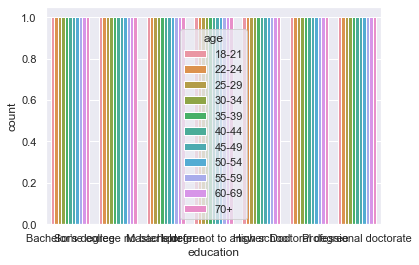

In [92]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='education', hue="age", data=df6)
plt.show()

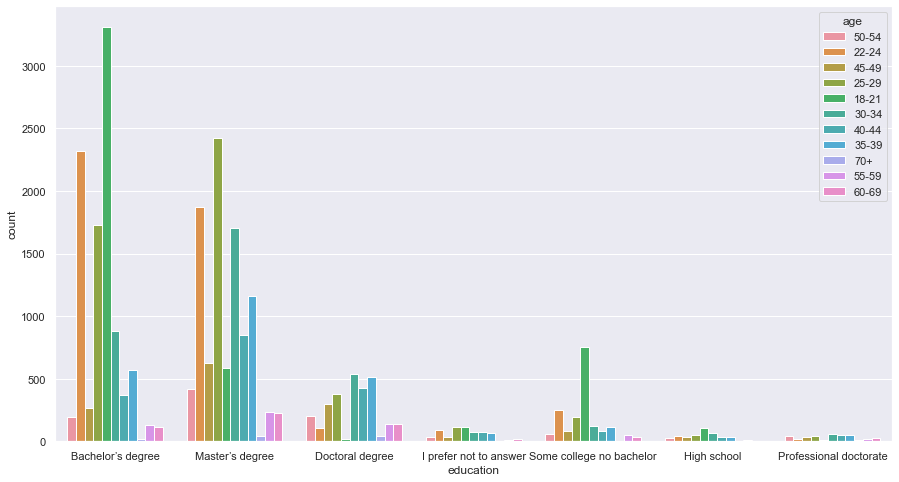

In [99]:
sns.set(style="darkgrid")
plt.figure(figsize = (15,8))
ax = sns.countplot(x='education', hue="age", data=data)
plt.show()

In [106]:
#age_ed = data[['age'].value_counts()][data['education'].value_counts()]
#age_ed.sort_values(by='age', ascending=False,inplace=True)
#top_20_pot = pot_players[:10]                       


#fig = px.bar(age_ed, x='education', y='age', color='age', orientation='h',
             #hover_data=['age', 'education'],
             #height=600,
             #title='Top 10 players under 21')
#fig.show()

df6 = data.groupby('age')['education'].value_counts()
df6 = df6.reset_index(name='count')
df6.sort_values(by='age', ascending=True,inplace=True)

fig = px.bar(df6, x='age', y='education', color='count', orientation='v',
             hover_data=['age', 'education'],
             height=600,
             title='Top 10 players under 21')
fig.show()

In [113]:
fig = px.histogram(df6, y='age', color='education', x='count',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [114]:
df7 = data.groupby('age')['salary'].value_counts()
df7 = df7.reset_index(name='count')

In [121]:
fig = px.histogram(df7, y='age', color='salary', x='count',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [117]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [ ]:
scatterplot
chisquare
cat -> numerical

In [128]:
fig = px.histogram(df8, y='count', color='salary', x='gender',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [133]:
def dist_cat(df):
    for col in df.select_dtypes(np.object):
        fig, axes = plt.subplots(1, figsize=(15, 8))
        sns.countplot(y=df[col], data=df)
        plt.show()

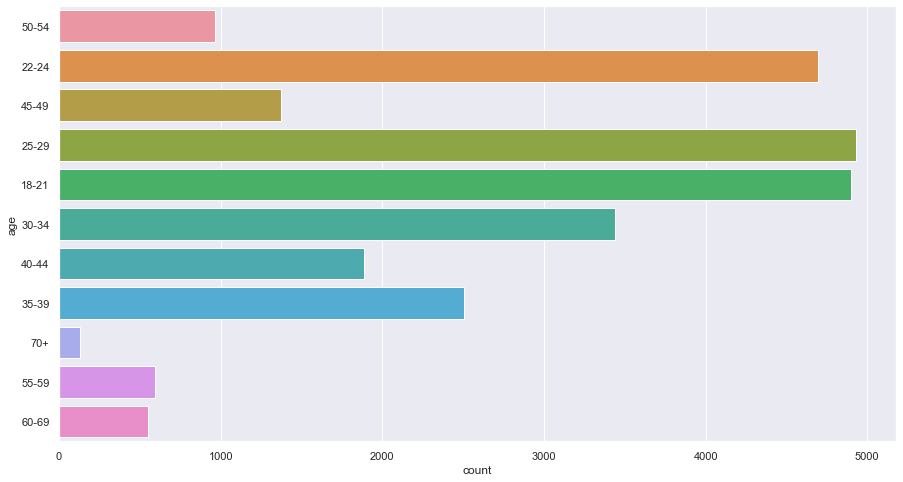

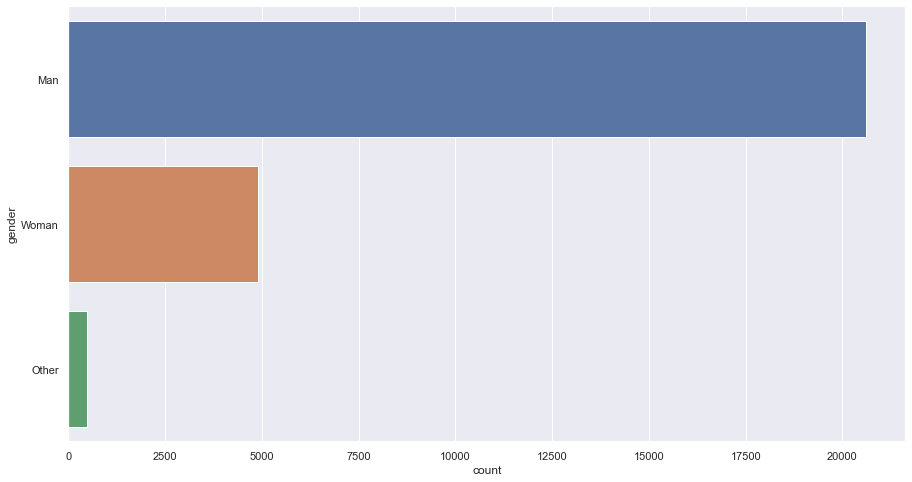

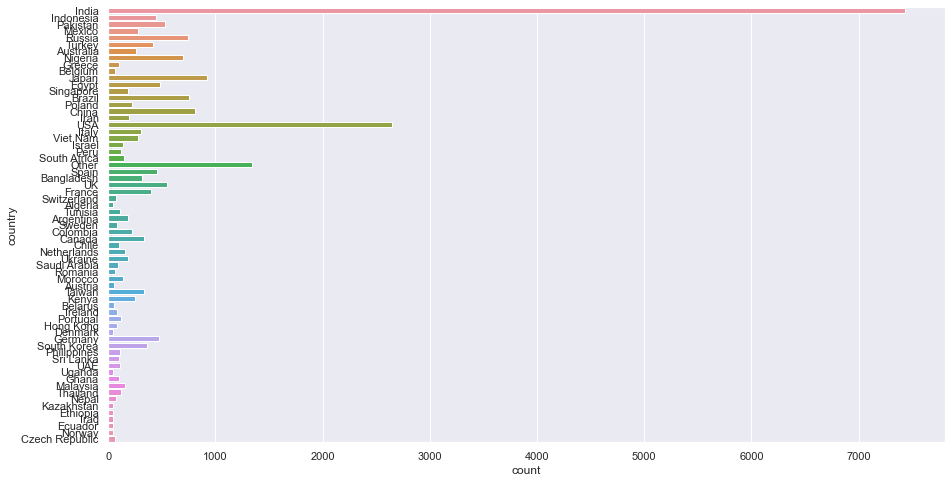

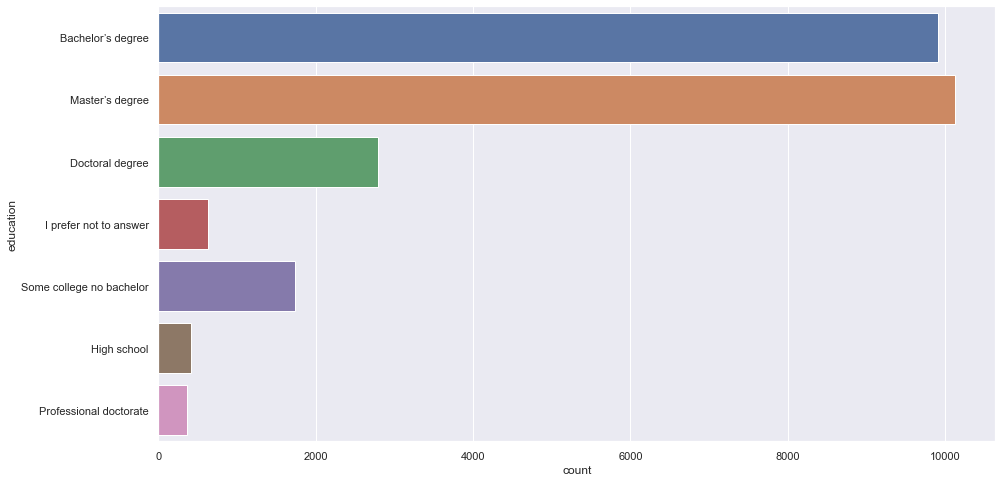

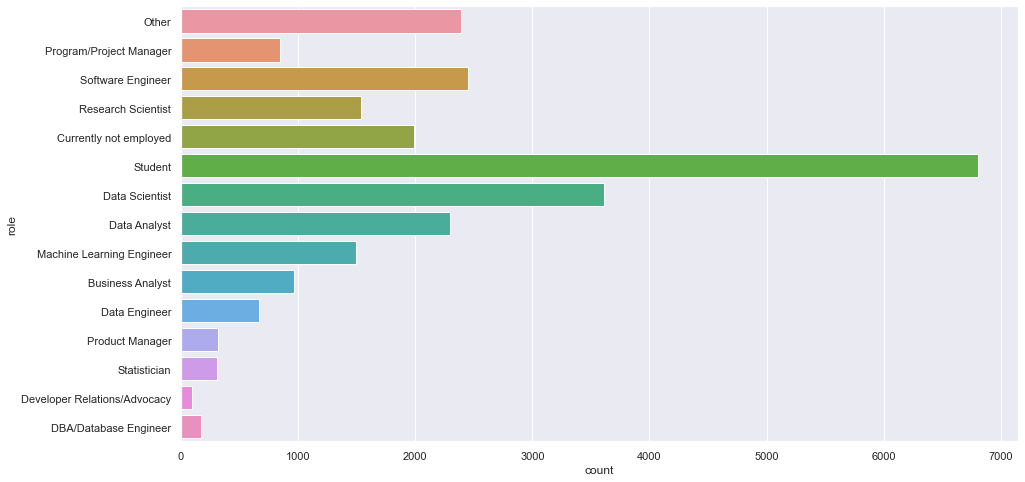

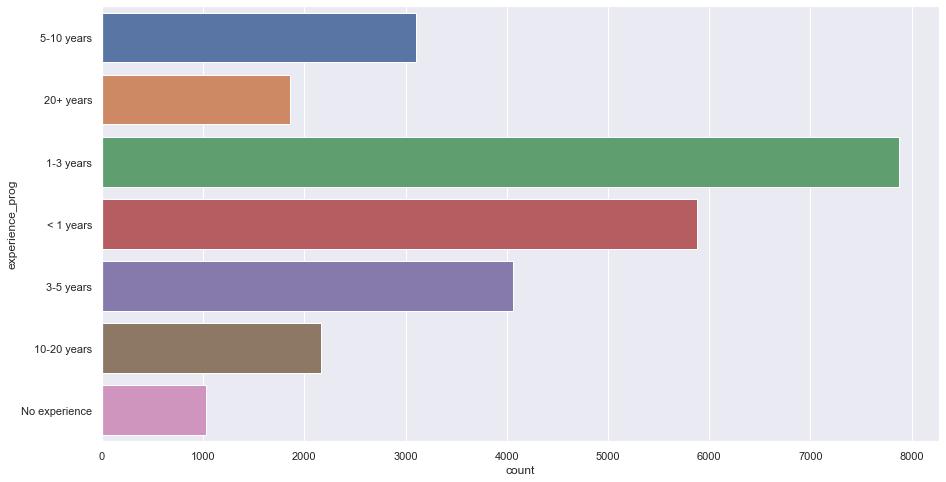

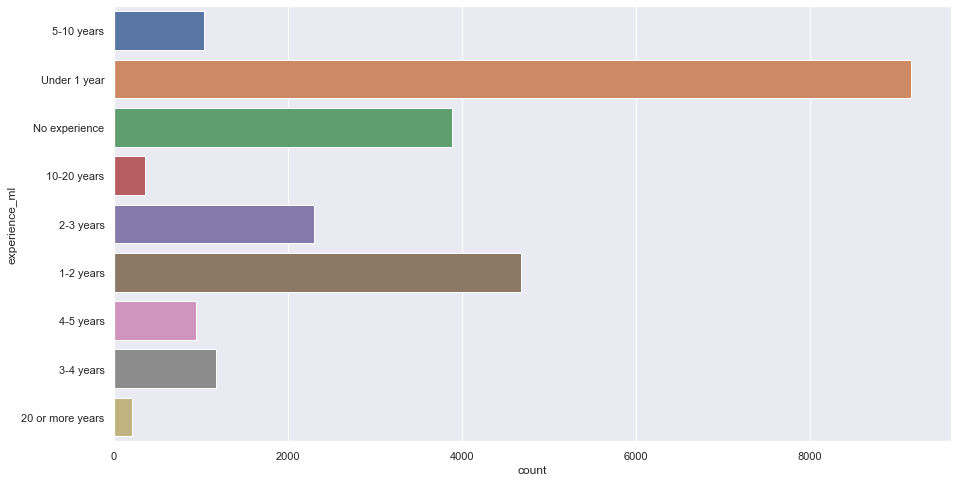

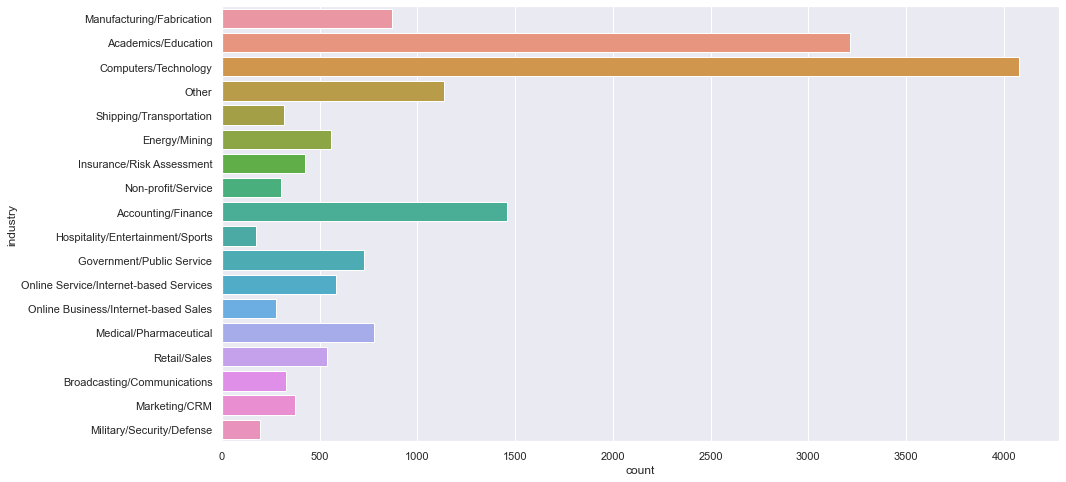

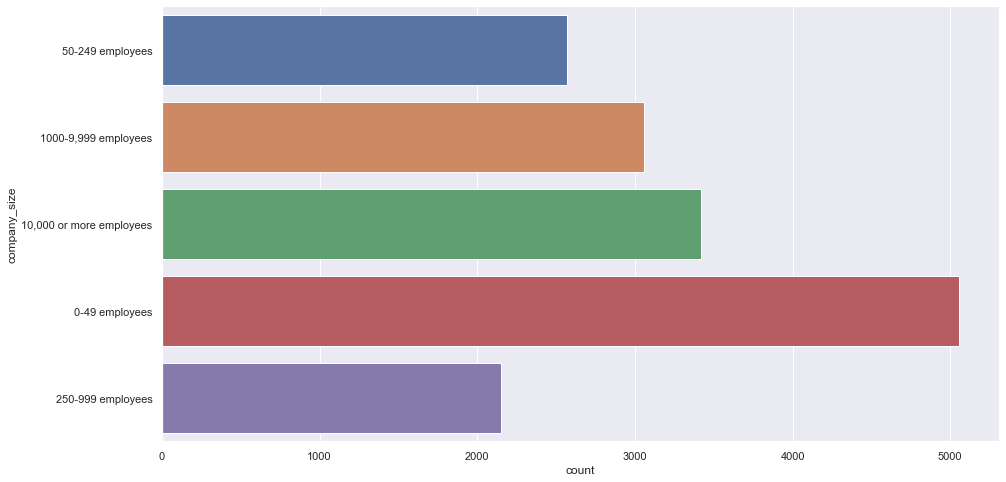

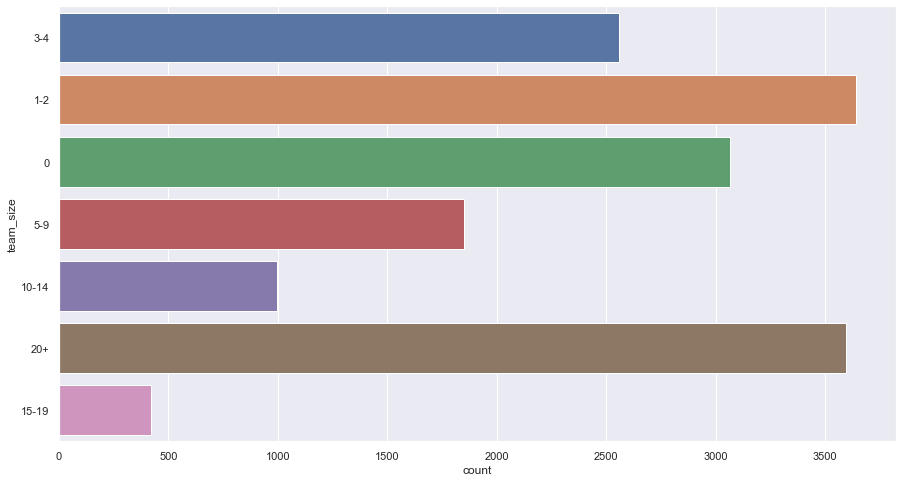

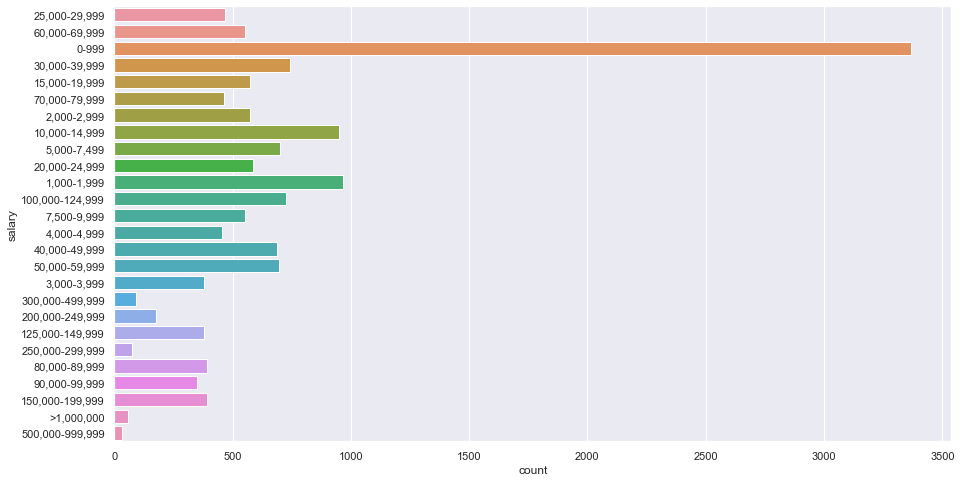

In [134]:
dist_cat(data)

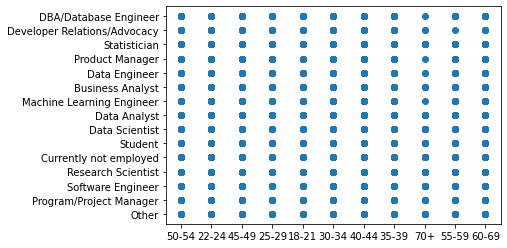

In [13]:
plt.scatter(data['age'], data['role'])

In [9]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# This is to encode the data into numbers that can be used in our scatterplot
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
enc_df = pd.DataFrame(ord_enc.fit_transform(df), columns=list(df.columns))
categories = pd.DataFrame(np.array(ord_enc.categories_).transpose(), columns=list(df.columns))

# Generate the random noise
xnoise, ynoise = np.random.random(len(df))/2, np.random.random(len(df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(enc_df["Playing_Role"]+xnoise, enc_df["Bought_By"]+ynoise, alpha=0.5)
# You can also set xticks and yticks to be your category names:
plt.xticks([0.25, 1.25, 2.25], categories["Playing_Role"]) # The reason the xticks start at 0.25
# and go up in increments of 1 is because the center of the noise will be around 0.25 and ordinal
# encoded labels go up in increments of 1.
plt.yticks([0.25, 1.25, 2.25], categories["Bought_By"]) # This has the same reason explained for xticks

# Extra unnecessary styling...
plt.grid()
sns.despine(left=True, bottom=True)

In [15]:
xnoise, ynoise = np.random.random(len(data))/2, np.random.random(len(data))/2 

In [18]:

fig = px.scatter(data, x="age", y="education")
fig.show()

In [ ]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

/Users/ritasilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



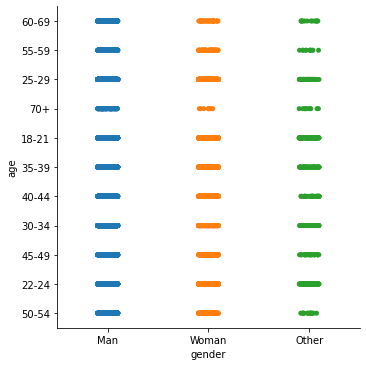

In [39]:
sns.catplot("gender", "age", data = data)

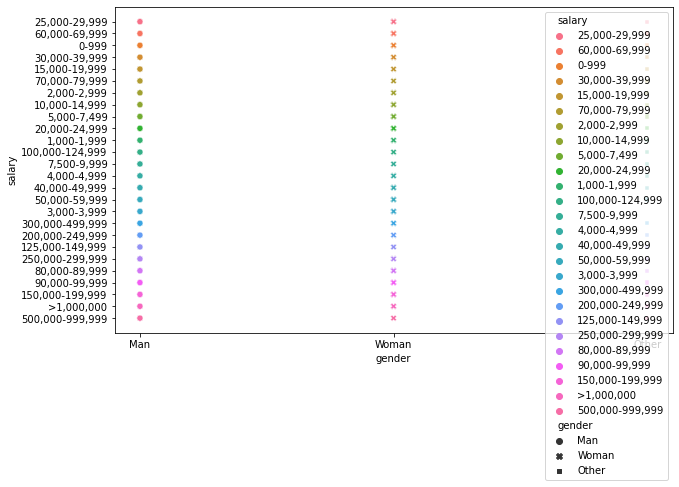

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='gender', y='salary',
                style='gender',
                hue='salary',
                data=data,
                ax=ax)
plt.show()

In [ ]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [27]:
def col_cat_val(data, columns=[]):
    for i in columns:
        for j in columns:
            if i != j:
                data_crosstab = pd.crosstab(data[i], data[j], margins = False)
                print (i,"vs", j)
                print (chi2_contingency(data_crosstab, correction=False), '\n')


In [22]:
col_cat_val(data)

In [53]:
col_cat_val(data, columns= data.select_dtypes(np.object))

age vs gender
(234.57483117655224, 1.4473348559613121e-38, 20, array([[3.88675925e+03, 9.15175374e+01, 9.22723213e+02],
       [3.72259700e+03, 8.76521773e+01, 8.83750818e+02],
       [3.91055088e+03, 9.20777346e+01, 9.28371386e+02],
       [2.72889993e+03, 6.42546106e+01, 6.47845455e+02],
       [1.98580803e+03, 4.67577869e+01, 4.71434182e+02],
       [1.49887268e+03, 3.52924191e+01, 3.55834905e+02],
       [1.09044970e+03, 2.56757017e+01, 2.58874601e+02],
       [7.64504370e+02, 1.80010010e+01, 1.81494629e+02],
       [4.69488161e+02, 1.10545567e+01, 1.11457283e+02],
       [4.38559042e+02, 1.03263004e+01, 1.04114658e+02],
       [1.01510954e+02, 2.39017441e+00, 2.40988719e+01]])) 

age vs country
(7681.812994117272, 0.0, 640, array([[8.30262195e+00, 3.43426635e+01, 4.98157317e+01, 9.62349363e+00,
        5.98166173e+01, 9.62349363e+00, 1.22652370e+01, 1.41710661e+02,
        6.24583606e+01, 1.92469873e+01, 1.53598506e+02, 4.24565895e+01,
        1.18878451e+01, 9.05740577e+00, 9.434

        1.20691487e+01, 1.54252493e+00, 3.35314365e+01]])) 

age vs experience_prog
(14532.385633540729, 0.0, 60, array([[1485.79193778,  408.71543526,  350.97447349,  766.29426712,
         584.76875987, 1109.72090248,  194.734224  ],
       [1423.03761599,  391.45281639,  336.15061795,  733.92884919,
         560.07030378, 1062.85042159,  186.50937512],
       [1494.88676703,  411.21726408,  353.12285835,  770.9849074 ,
         588.34824626, 1116.51372579,  195.92623109],
       [1043.17691449,  286.95976591,  246.41974358,  538.01644015,
         410.5670889 ,  779.1368344 ,  136.72321257],
       [ 759.11508105,  208.81931236,  179.31852308,  391.51210873,
         298.76779733,  566.97431949,   99.49285797],
       [ 572.97424248,  157.6152158 ,  135.34824626,  295.51033766,
         225.50764255,  427.94786894,   75.09644631],
       [ 416.84634043,  114.66715435,   98.46763947,  214.98767951,
         164.05979286,  311.33773534,   54.63365803],
       [ 292.24717976,   80.3920

gender vs education
(147.41639080306643, 1.8940712140568913e-25, 12, array([[7.85678920e+03, 2.21658684e+03, 3.30703654e+02, 4.97245062e+02,
        8.03522643e+03, 2.85499557e+02, 1.37594925e+03],
       [1.84995765e+02, 5.21916991e+01, 7.78674008e+00, 1.17081200e+01,
        1.89197243e+02, 6.72236553e+00, 3.23980672e+01],
       [1.86521503e+03, 5.26221461e+02, 7.85096061e+01, 1.18046818e+02,
        1.90757633e+03, 6.77780772e+01, 3.26652678e+02]])) 

gender vs role
(302.18707029754563, 9.028357333894705e-48, 28, array([[7.67676587e+02, 1.57500589e+03, 1.35612290e+02, 1.82481800e+03,
        5.29760290e+02, 2.86768444e+03, 7.85123782e+01, 1.18878843e+03,
        1.89777900e+03, 2.52984330e+02, 6.73303122e+02, 1.21971755e+03,
        1.94219004e+03, 2.48226004e+02, 5.39594163e+03],
       [1.80756940e+01, 3.70850499e+01, 3.19312363e+00, 4.29671197e+01,
        1.24737227e+01, 6.75224271e+01, 1.84865052e+00, 2.79911832e+01,
        4.46850576e+01, 5.95676279e+00, 1.58535787e+01, 2.87

country vs education
(4038.636654512343, 0.0, 384, array([[1.67831209e+01, 4.73491703e+00, 7.06425904e-01, 1.06217996e+00,
        1.71642860e+01, 6.09864090e-01, 2.93920610e+00],
       [6.94210911e+01, 1.95853386e+01, 2.92203442e+00, 4.39356255e+00,
        7.09977284e+01, 2.52261964e+00, 1.21576252e+01],
       [1.00698726e+02, 2.84095022e+01, 4.23855542e+00, 6.37307974e+00,
        1.02985716e+02, 3.65918454e+00, 1.76352366e+01],
       [1.94531629e+01, 5.48819928e+00, 8.18811843e-01, 1.23116313e+00,
        1.98949679e+01, 7.06887922e-01, 3.40680707e+00],
       [1.20914758e+02, 3.41129250e+01, 5.08947753e+00, 7.65252377e+00,
        1.23660879e+02, 4.39379355e+00, 2.11756439e+01],
       [1.94531629e+01, 5.48819928e+00, 8.18811843e-01, 1.23116313e+00,
        1.98949679e+01, 7.06887922e-01, 3.40680707e+00],
       [2.47932468e+01, 6.99476379e+00, 1.04358372e+00, 1.56912948e+00,
        2.53563316e+01, 9.00935587e-01, 4.34200901e+00],
       [2.86457360e+02, 8.08164247e+01, 1.2057

country vs industry
(3427.5666775580366, 9.457206680889648e-240, 1088, array([[ 5.11877489,  2.32367534,  0.51920368, ...,  1.80924962,
         0.85366003,  0.50327718],
       [27.36575804, 12.42272588,  2.77574273, ...,  9.6725268 ,
         4.56379786,  2.69059724],
       [40.16269525, 18.23191424,  4.07375191, ..., 14.19565084,
         6.69794793,  3.9487902 ],
       ...,
       [ 4.72502297,  2.14493109,  0.47926493, ...,  1.67007657,
         0.78799387,  0.46456355],
       [25.59387443, 11.61837672,  2.59601838, ...,  9.04624809,
         4.26830015,  2.51638591],
       [33.66578867, 15.282634  ,  3.41476263, ..., 11.89929556,
         5.61445636,  3.31001531]])) 

country vs company_size
(1764.066667842536, 4.007350421850482e-223, 256, array([[   8.08750231,    5.46526368,    4.89409882,    3.44618793,
           4.10694726],
       [  42.92597379,   29.00793797,   25.97637068,   18.29130515,
          21.79841241],
       [  63.14472956,   42.67109716,   38.21161775,   2

education vs age
(6273.398106863776, 0.0, 60, array([[1.86941081e+03, 1.79045386e+03, 1.88085385e+03, 1.31251634e+03,
        9.55112155e+02, 7.20911331e+02, 5.24472529e+02, 3.67702922e+02,
        2.25809263e+02, 2.10933315e+02, 4.88236245e+01],
       [5.27405190e+02, 5.05129558e+02, 5.30633543e+02, 3.70292034e+02,
        2.69459824e+02, 2.03386209e+02, 1.47966157e+02, 1.03737728e+02,
        6.37061564e+01, 5.95092981e+01, 1.37743041e+01],
       [7.86862126e+01, 7.53627998e+01, 7.91678666e+01, 5.52457167e+01,
        4.02020560e+01, 3.03442036e+01, 2.20758095e+01, 1.54771493e+01,
        9.50463943e+00, 8.87848920e+00, 2.05505717e+00],
       [1.18312363e+02, 1.13315289e+02, 1.19036576e+02, 8.30673007e+01,
        6.04476957e+01, 4.56254572e+01, 3.31931236e+01, 2.32713972e+01,
        1.42911485e+01, 1.33496708e+01, 3.08997805e+00],
       [1.91186740e+03, 1.83111724e+03, 1.92357032e+03, 1.34232518e+03,
        9.76803912e+02, 7.37284103e+02, 5.36383937e+02, 3.76053902e+02,
      

education vs experience_prog
(3228.4218350479246, 0.0, 36, array([[3003.41577792,  826.1872714 ,  709.468294  , 1549.00577523,
        1182.0657221 , 2243.21668656,  393.6404728 ],
       [ 847.33492473,  233.08705194,  200.15785624,  437.01131945,
         333.48881531,  632.86470566,  111.05532669],
       [ 126.41812652,   34.77542063,   29.86254957,   65.1998999 ,
          49.75486082,   94.4202441 ,   16.56889847],
       [ 190.08193124,   52.28822238,   44.9012436 ,   98.03438186,
          74.81126554,  141.97000732,   24.91294806],
       [3071.62699727,  844.95098756,  725.58118046, 1584.18557733,
        1208.91187002, 2294.16286143,  402.58052593],
       [ 109.13795095,   30.02194587,   25.78061833,   56.28768336,
          42.95383668,   81.5138798 ,   14.30408501],
       [ 525.98429138,  144.68910022,  124.24825781,  271.27536288,
         207.01362954,  392.85161514,   68.93774304]])) 

education vs experience_ml
(3968.9164745419175, 0.0, 48, array([[1.76734445e+03, 1.

role vs experience_ml
(4652.66200071542, 0.0, 112, array([[1.59612065e+02, 1.23592658e+01, 7.86964301e+01, 7.20388145e+00,
        3.99798350e+01, 3.22638292e+01, 3.52682917e+01, 1.32776753e+02,
        3.12839648e+02],
       [3.68229561e+02, 2.85131767e+01, 1.81554896e+02, 1.66195588e+01,
        9.22346131e+01, 7.44335691e+01, 8.13649491e+01, 3.06319736e+02,
        7.21729940e+02],
       [3.03085796e+01, 2.34688895e+00, 1.49435884e+01, 1.36793803e+00,
        7.59173192e+00, 6.12654711e+00, 6.69706155e+00, 2.52128484e+01,
        5.94048160e+01],
       [4.12117959e+02, 3.19115938e+01, 2.03193988e+02, 1.86004041e+01,
        1.03227835e+02, 8.33051276e+01, 9.10626421e+01, 3.42829250e+02,
        8.07751200e+02],
       [1.25957733e+02, 9.75330471e+00, 6.21032247e+01, 5.68493727e+00,
        3.15500547e+01, 2.54609750e+01, 2.78319441e+01, 1.04780669e+02,
        2.46877158e+02],
       [6.79974952e+02, 5.26526059e+01, 3.35260377e+02, 3.06897786e+01,
        1.70320999e+02, 1.374494

experience_prog vs country
(4107.018703631245, 0.0, 384, array([[1.33390829e+01, 5.51752974e+01, 8.00344974e+01, 1.54612097e+01,
        9.61020290e+01, 1.54612097e+01, 1.97054634e+01, 2.27673892e+02,
        1.00346283e+02, 3.09224194e+01, 2.46773034e+02, 6.82112193e+01,
        1.90991414e+01, 1.45517268e+01, 1.51580487e+01, 1.46123590e+02,
        1.30359219e+01, 1.21567551e+02, 1.42485658e+02, 3.00129365e+01,
        3.09224194e+01, 2.39497170e+01, 2.25369869e+03, 1.34603473e+02,
        5.91163901e+01, 1.30359219e+01, 2.54655219e+01, 4.18362145e+01,
        9.42830632e+01, 2.79211258e+02, 1.36422439e+01, 7.51839218e+01,
        4.72931121e+01, 8.45819120e+01, 4.24425365e+01, 2.27370731e+01,
        4.63836292e+01, 2.12819004e+02, 1.36422439e+01, 4.05932545e+02,
        1.60675317e+02, 3.54698341e+01, 3.27413853e+01, 6.63922535e+01,
        3.60761560e+01, 1.84928195e+01, 2.24945443e+02, 2.69813268e+01,
        5.51752974e+01, 4.42615023e+01, 1.08834790e+02, 1.37635083e+02,
       

         21.85368072,   3.62146709]])) 

experience_ml vs age
(4620.686960947266, 0.0, 80, array([[8.56315778e+02, 8.46278522e+02, 8.94496716e+02, 6.18964174e+02,
        4.50102088e+02, 3.47367812e+02, 2.50734613e+02, 1.76144018e+02,
        1.09228972e+02, 1.01159805e+02, 2.42075019e+01],
       [6.63072325e+01, 6.55300160e+01, 6.92637030e+01, 4.79283489e+01,
        3.48528248e+01, 2.68977856e+01, 1.94151722e+01, 1.36393871e+01,
        8.45794393e+00, 7.83312284e+00, 1.87446325e+00],
       [4.22204892e+02, 4.17256041e+02, 4.41029932e+02, 3.05179128e+02,
        2.21921992e+02, 1.71269049e+02, 1.23624232e+02, 8.68474783e+01,
        5.38551402e+01, 4.98766524e+01, 1.19354635e+01],
       [3.86486907e+01, 3.81956723e+01, 4.03719374e+01, 2.79361371e+01,
        2.03147680e+01, 1.56779911e+01, 1.13165783e+01, 7.95002947e+00,
        4.92990654e+00, 4.56571525e+00, 1.09257388e+00],
       [2.14491075e+02, 2.11976930e+02, 2.24054686e+02, 1.55038941e+02,
        1.12742149e+02, 8.7009135

experience_ml vs industry
(341.42348282854687, 1.1867254950438684e-19, 136, array([[ 616.76292149,  276.71865642,   63.32560864,  803.27821898,
         104.04947272,  134.38875146,   31.9682333 ,   82.8730634 ,
         167.98593933,   69.02694962,  144.97695613,   37.66957427,
          55.79169379,   52.53378466,  114.43405807,  213.18942846,
          99.16260904,   59.8640802 ],
       [  67.63097253,   30.34350996,    6.94395261,   88.08325739,
          11.40951699,   14.73636245,    3.50546804,    9.08742351,
          18.42045307,    7.56913162,   15.89740919,    4.13064705,
           6.1178232 ,    5.76057805,   12.54823591,   23.37722953,
          10.87364926,    6.56437964],
       [ 366.15369093,  164.27958599,   37.59451894,  476.8822419 ,
          61.77105846,   79.78258039,   18.97858352,   49.19925791,
          99.72822549,   40.97923447,   86.06848067,   22.36329905,
          33.12185913,   31.18773597,   67.93607603,  126.56418435,
          58.86987371,   35.53

industry vs education
(1814.8128008822325, 2.2387733993826e-311, 102, array([[1015.87993874,  452.61782542,   48.23460949,   72.25347626,
        1409.04122511,   59.45653905,  156.51638591],
       [ 461.16018377,  205.46652374,   21.89617152,   32.79957121,
         639.63632466,   26.99038285,   71.05084227],
       [ 103.04196018,   45.90958652,    4.89249617,    7.32875957,
         142.92079632,    6.03075038,   15.87565084],
       [1289.28882083,  574.43313936,   61.21623277,   91.69941807,
        1788.26358346,   75.45837672,  198.64042879],
       [ 176.37243492,   78.58143951,    8.37427259,   12.54431853,
         244.63130168,   10.32257274,   27.17366003],
       [ 229.47381317,  102.24036753,   10.89555896,   16.3211026 ,
         318.2837366 ,   13.4304441 ,   35.35497703],
       [  54.68177642,   24.36306279,    2.59632466,    3.88918836,
          75.84447167,    3.20036753,    8.42480858],
       [ 134.01776417,   59.71062787,    6.36324655,    9.53188361,
        

company_size vs age
(934.4934660219608, 5.3900774413017566e-170, 40, array([[ 334.69817242,  701.12423851, 1061.01809119,  856.96418682,
         642.64537567,  495.20398745,  368.29241277,  256.93372716,
         161.12793059,  145.57504154,   31.41683589],
       [ 226.17783521,  473.79632023,  717.00055381,  579.10774722,
         434.2782598 ,  334.64229894,  248.87969971,  173.62722294,
         108.88486862,   98.37474617,   21.23044736],
       [ 202.54039751,  424.28072119,  642.06811888,  518.58624085,
         388.89262199,  299.66943573,  222.86973109,  155.48175497,
          97.50550735,   88.09377884,   19.01169159],
       [ 142.6191619 ,  298.75798412,  452.11334687,  365.16337456,
         273.8393945 ,  211.01273768,  156.93409636,  109.48273952,
          68.65866716,   62.03138268,   13.38711464],
       [ 169.96443296,  356.04073595,  538.79988924,  435.17845056,
         326.34434804,  251.47154021,  187.02406006,  130.47455541,
          81.82302628,   73.9250507

company_size vs experience_prog
(477.21250928790454, 8.879139227008745e-86, 24, array([[1225.25659959,  595.98670851,  526.62082333,  807.19494185,
         764.26896806,  836.12331549,  299.54864316],
       [ 827.98744693,  402.74789244,  355.87274629,  545.47535536,
         516.46741739,  565.02418313,  202.42495846],
       [ 741.45597194,  360.65743647,  318.68112732,  488.46870962,
         462.49233893,  505.97452464,  181.26989108],
       [ 522.09747092,  253.95754107,  224.39985232,  343.95606424,
         325.66475909,  356.28281337,  127.64149898],
       [ 622.20251061,  302.65042151,  267.42545074,  409.90492893,
         388.10651652,  424.59516337,  152.11500831]])) 

company_size vs experience_ml
(297.18586640794865, 9.467547904401282e-45, 32, array([[ 962.64782836,  105.8974359 ,  571.47566719,   59.89534275,
         312.13500785,  267.36787023,  304.41653585,  652.05651491,
        1484.10779696],
       [ 659.57692308,   72.55769231,  391.55769231,   41.03846154,


         33.49869776]])) 

team_size vs experience_prog
(774.368553498265, 2.0463687767452985e-139, 36, array([[741.39451817, 363.09711026, 320.72628054, 489.63958824,
        464.93910455, 501.22981521, 182.97358303],
       [881.25288354, 431.59258341, 381.22882302, 582.00632519,
        552.6462855 , 595.7829592 , 217.49014015],
       [241.0016123 , 118.03026169, 104.25697631, 159.16482699,
        151.13555748, 162.93240729,  59.47835793],
       [101.8691554 ,  49.89030138,  44.06846087,  67.27750217,
         63.88360412,  68.87002356,  25.1409525 ],
       [869.8803175 , 426.0228823 , 376.3090661 , 574.49553516,
        545.5143867 , 588.09438174, 214.68343048],
       [618.9579561 , 303.13394518, 267.76038695, 408.7787424 ,
        388.15738559, 418.45491752, 152.75666625],
       [447.64355699, 219.23291579, 193.6500062 , 295.63747985,
        280.72367605, 302.63549547, 110.47686965]])) 

team_size vs experience_ml
(1591.0924711026958, 6.519201449017989e-302, 48, array([[ 56

salary vs education
(959.5056864361632, 3.9291466358158703e-118, 150, array([[1.04565740e+03, 4.85288350e+02, 4.99078682e+01, 7.31106491e+01,
        1.48826139e+03, 6.34793061e+01, 1.63295043e+02],
       [3.00754532e+02, 1.39579819e+02, 1.43546228e+01, 2.10282633e+01,
        4.28057371e+02, 1.82580729e+01, 4.69673186e+01],
       [2.94857384e+02, 1.36842960e+02, 1.40731596e+01, 2.06159444e+01,
        4.19664089e+02, 1.79000715e+01, 4.60463907e+01],
       [2.25022741e+02, 1.04432785e+02, 1.07400429e+01, 1.57332207e+01,
        3.20269963e+02, 1.36605809e+01, 3.51406666e+01],
       [1.17632577e+02, 5.45931388e+01, 5.61445000e+00, 8.22467676e+00,
        1.67423884e+02, 7.14118641e+00, 1.83700864e+01],
       [1.77845559e+02, 8.25379118e+01, 8.48833734e+00, 1.24346696e+01,
        2.53123709e+02, 1.07965694e+01, 2.77732441e+01],
       [1.21667468e+02, 5.64657267e+01, 5.80703008e+00, 8.50678968e+00,
        1.73166656e+02, 7.38613475e+00, 1.90001949e+01],
       [1.78466311e+02, 8.2

           9.33064778]])) 

salary vs team_size
(1644.3122698217971, 1.4794491294049439e-249, 150, array([[629.53960107, 762.40835553, 209.48171009,  88.65213436,
        751.9014359 , 536.94737184, 390.0693912 ],
       [181.06971607, 219.28575141,  60.25164057,  25.49834319,
        216.26372555, 154.43811318, 112.19271003],
       [177.51932948, 214.9860308 ,  59.07023585,  24.99837567,
        212.02326035, 151.40991489, 109.99285297],
       [135.47527776, 164.06828666,  45.07991683,  19.07770775,
        161.807225  , 115.54967189,  83.94191411],
       [ 70.82086934,  85.76811123,  23.56591515,   9.97303619,
         84.58612176,  60.4045871 ,  43.88135924],
       [107.07218504, 129.67052173,  35.6286791 ,  15.07796764,
        127.88350335,  91.3240855 ,  66.34305763],
       [ 73.25008122,  88.71002534,  24.37424469,  10.31511923,
         87.48749269,  62.47651225,  45.38652459],
       [107.44590995, 130.1231239 ,  35.75303749,  15.1305958 ,
        128.3298681 ,  91.642843

age vs experience_prog
(14532.385633540729, 0.0, 60, array([[1485.79193778,  408.71543526,  350.97447349,  766.29426712,
         584.76875987, 1109.72090248,  194.734224  ],
       [1423.03761599,  391.45281639,  336.15061795,  733.92884919,
         560.07030378, 1062.85042159,  186.50937512],
       [1494.88676703,  411.21726408,  353.12285835,  770.9849074 ,
         588.34824626, 1116.51372579,  195.92623109],
       [1043.17691449,  286.95976591,  246.41974358,  538.01644015,
         410.5670889 ,  779.1368344 ,  136.72321257],
       [ 759.11508105,  208.81931236,  179.31852308,  391.51210873,
         298.76779733,  566.97431949,   99.49285797],
       [ 572.97424248,  157.6152158 ,  135.34824626,  295.51033766,
         225.50764255,  427.94786894,   75.09644631],
       [ 416.84634043,  114.66715435,   98.46763947,  214.98767951,
         164.05979286,  311.33773534,   54.63365803],
       [ 292.24717976,   80.39209949,   69.03476687,  150.72590767,
         115.02082932,  2

age vs salary
(4090.8421695571183, 0.0, 250, array([[2.03790462e+02, 5.86147099e+01, 5.74654019e+01, 4.38551751e+01,
        2.29256708e+01, 3.46607108e+01, 2.37120395e+01, 3.47816906e+01,
        3.55075694e+01, 1.07067117e+01, 2.84302514e+01, 4.53674225e+00,
        2.29861607e+01, 4.48230134e+01, 5.50458060e+00, 2.75833929e+01,
        4.16170489e+01, 4.22824378e+01, 4.21614580e+01, 1.93567669e+00,
        3.33299331e+01, 3.33904230e+01, 2.80673121e+01, 2.36515496e+01,
        2.11714638e+01, 3.50841401e+00],
       [4.57926580e+02, 1.31709960e+02, 1.29127412e+02, 9.85446040e+01,
        5.15150413e+01, 7.78842180e+01, 5.32820480e+01, 7.81560652e+01,
        7.97871483e+01, 2.40584757e+01, 6.38840881e+01, 1.01942694e+01,
        5.16509648e+01, 1.00719381e+02, 1.23690468e+01, 6.19811578e+01,
        9.35154311e+01, 9.50105906e+01, 9.47387434e+01, 4.34955493e+00,
        7.48938990e+01, 7.50298226e+01, 6.30685466e+01, 5.31461244e+01,
        4.75732571e+01, 7.88356832e+00],
       [7

gender vs company_size
(10.36471254707356, 0.2403549806477123, 8, array([[4136.13531475, 2795.06196542, 2502.95507969, 1762.46003323,
        2100.38760692],
       [  89.27358316,   60.32810289,   54.02332164,   38.04061289,
          45.33437942],
       [ 829.59110209,  560.6099317 ,  502.02159867,  353.49935389,
         421.27801366]])) 

gender vs team_size
(30.669263876433188, 0.0022120469605010685, 12, array([[2511.84918765, 2985.69018976,  816.51494481,  345.13332507,
        2947.15986605, 2097.03336227, 1516.6191244 ],
       [  53.77105296,   63.91454794,   17.47910207,    7.38825499,
          63.08973087,   44.89110753,   32.46620365],
       [ 498.37975939,  592.39526231,  162.00595312,   68.47841994,
         584.75040308,  416.0755302 ,  300.91467196]])) 

gender vs salary
(293.3788901712158, 3.7270342588276666e-36, 50, array([[2.76725996e+03, 7.95926061e+02, 7.80319667e+02, 5.95507115e+02,
        3.11306478e+02, 4.70655968e+02, 3.21984536e+02, 4.72298746e+02,
       

(4039.788711566135, 0.0, 896, array([[1.63985677e+00, 3.36441689e+00, 2.89685443e-01, 3.89804797e+00,
        1.13163670e+00, 6.12574597e+00, 1.67712625e-01, 2.53940631e+00,
        4.05390213e+00, 5.40407346e-01, 1.43826281e+00, 2.60547492e+00,
        4.14876988e+00, 5.30242945e-01, 1.15264313e+01],
       [6.78304393e+00, 1.39164517e+01, 1.19824433e+00, 1.61237439e+01,
        4.68086089e+00, 2.53383129e+01, 6.93720402e-01, 1.05039079e+01,
        1.67684134e+01, 2.23532130e+00, 5.94917799e+00, 1.07771917e+01,
        1.71608209e+01, 2.19327763e+00, 4.76775113e+01],
       [9.83914065e+00, 2.01865014e+01, 1.73811266e+00, 2.33882878e+01,
        6.78982020e+00, 3.67544758e+01, 1.00627575e+00, 1.52364378e+01,
        2.43234128e+01, 3.24244408e+00, 8.62957687e+00, 1.56328495e+01,
        2.48926193e+01, 3.18145767e+00, 6.91585878e+01],
       [1.90074308e+00, 3.89966504e+00, 3.35771763e-01, 4.51819197e+00,
        1.31166981e+00, 7.10029646e+00, 1.94394179e-01, 2.94340276e+00,
       

country vs company_size
(1764.066667842536, 4.007350421850482e-223, 256, array([[   8.08750231,    5.46526368,    4.89409882,    3.44618793,
           4.10694726],
       [  42.92597379,   29.00793797,   25.97637068,   18.29130515,
          21.79841241],
       [  63.14472956,   42.67109716,   38.21161775,   26.90677497,
          32.06578057],
       [  12.13125346,    8.19789551,    7.34114824,    5.16928189,
           6.1604209 ],
       [  46.65866716,   31.53036736,   28.23518553,   19.88185342,
          23.69392653],
       [  11.19808012,    7.56728817,    6.77644453,    4.77164482,
           5.68654237],
       [  14.93077349,   10.08971756,    9.03525937,    6.3621931 ,
           7.58205649],
       [ 176.36976186,  119.18478863,  106.72900129,   75.15340594,
          89.56304227],
       [  74.03175189,   50.02818288,   44.7998277 ,   31.5458741 ,
          37.59436342],
       [  25.19568027,   17.02639838,   15.24700018,   10.73620085,
          12.79472032],
       

education vs country
(4038.6366545123437, 0.0, 384, array([[1.67831209e+01, 6.94210911e+01, 1.00698726e+02, 1.94531629e+01,
        1.20914758e+02, 1.94531629e+01, 2.47932468e+01, 2.86457360e+02,
        1.26254842e+02, 3.89063258e+01, 3.10487737e+02, 8.58227775e+01,
        2.40303777e+01, 1.83088592e+01, 1.90717283e+01, 1.83851461e+02,
        1.64016864e+01, 1.52955261e+02, 1.79274246e+02, 3.77620221e+01,
        3.89063258e+01, 3.01333308e+01, 2.83558457e+03, 1.69356948e+02,
        7.43797405e+01, 1.64016864e+01, 3.20405036e+01, 5.26379702e+01,
        1.18626150e+02, 3.51301236e+02, 1.71645555e+01, 9.45957725e+01,
        5.95037924e+01, 1.06420244e+02, 5.34008393e+01, 2.86075925e+01,
        5.83594887e+01, 2.67767066e+02, 1.71645555e+01, 5.10740885e+02,
        2.02160320e+02, 4.46278443e+01, 4.11949332e+01, 8.35341701e+01,
        4.53907134e+01, 2.32675086e+01, 2.83024448e+02, 3.39476764e+01,
        6.94210911e+01, 5.56894467e+01, 1.36935009e+02, 1.73171293e+02,
        4.04

education vs salary
(959.5056864361633, 3.929146635815869e-118, 150, array([[1.04565740e+03, 3.00754532e+02, 2.94857384e+02, 2.25022741e+02,
        1.17632577e+02, 1.77845559e+02, 1.21667468e+02, 1.78466311e+02,
        1.82190826e+02, 5.49365863e+01, 1.45876811e+02, 2.32782145e+01,
        1.17942954e+02, 2.29988760e+02, 2.82442336e+01, 1.41531544e+02,
        2.13538821e+02, 2.16952960e+02, 2.16332207e+02, 9.93203820e+00,
        1.71017283e+02, 1.71327659e+02, 1.44014554e+02, 1.21357092e+02,
        1.08631668e+02, 1.80018192e+01],
       [4.85288350e+02, 1.39579819e+02, 1.36842960e+02, 1.04432785e+02,
        5.45931388e+01, 8.25379118e+01, 5.64657267e+01, 8.28260022e+01,
        8.45545449e+01, 2.54960042e+01, 6.77012540e+01, 1.08033916e+01,
        5.47371841e+01, 1.06737509e+02, 1.31081151e+01, 6.56846209e+01,
        9.91031122e+01, 1.00687610e+02, 1.00399519e+02, 4.60944708e+00,
        7.93689169e+01, 7.95129621e+01, 6.68369827e+01, 5.63216815e+01,
        5.04158274e+01, 8.

role vs experience_ml
(4652.66200071542, 0.0, 112, array([[1.59612065e+02, 1.23592658e+01, 7.86964301e+01, 7.20388145e+00,
        3.99798350e+01, 3.22638292e+01, 3.52682917e+01, 1.32776753e+02,
        3.12839648e+02],
       [3.68229561e+02, 2.85131767e+01, 1.81554896e+02, 1.66195588e+01,
        9.22346131e+01, 7.44335691e+01, 8.13649491e+01, 3.06319736e+02,
        7.21729940e+02],
       [3.03085796e+01, 2.34688895e+00, 1.49435884e+01, 1.36793803e+00,
        7.59173192e+00, 6.12654711e+00, 6.69706155e+00, 2.52128484e+01,
        5.94048160e+01],
       [4.12117959e+02, 3.19115938e+01, 2.03193988e+02, 1.86004041e+01,
        1.03227835e+02, 8.33051276e+01, 9.10626421e+01, 3.42829250e+02,
        8.07751200e+02],
       [1.25957733e+02, 9.75330471e+00, 6.21032247e+01, 5.68493727e+00,
        3.15500547e+01, 2.54609750e+01, 2.78319441e+01, 1.04780669e+02,
        2.46877158e+02],
       [6.79974952e+02, 5.26526059e+01, 3.35260377e+02, 3.06897786e+01,
        1.70320999e+02, 1.374494

experience_prog vs country
(4107.018703631245, 0.0, 384, array([[1.33390829e+01, 5.51752974e+01, 8.00344974e+01, 1.54612097e+01,
        9.61020290e+01, 1.54612097e+01, 1.97054634e+01, 2.27673892e+02,
        1.00346283e+02, 3.09224194e+01, 2.46773034e+02, 6.82112193e+01,
        1.90991414e+01, 1.45517268e+01, 1.51580487e+01, 1.46123590e+02,
        1.30359219e+01, 1.21567551e+02, 1.42485658e+02, 3.00129365e+01,
        3.09224194e+01, 2.39497170e+01, 2.25369869e+03, 1.34603473e+02,
        5.91163901e+01, 1.30359219e+01, 2.54655219e+01, 4.18362145e+01,
        9.42830632e+01, 2.79211258e+02, 1.36422439e+01, 7.51839218e+01,
        4.72931121e+01, 8.45819120e+01, 4.24425365e+01, 2.27370731e+01,
        4.63836292e+01, 2.12819004e+02, 1.36422439e+01, 4.05932545e+02,
        1.60675317e+02, 3.54698341e+01, 3.27413853e+01, 6.63922535e+01,
        3.60761560e+01, 1.84928195e+01, 2.24945443e+02, 2.69813268e+01,
        5.51752974e+01, 4.42615023e+01, 1.08834790e+02, 1.37635083e+02,
       

experience_prog vs salary
(3289.4246653487126, 0.0, 150, array([[807.93834059, 232.3811968 , 227.82470275, 173.86622052,
         90.89006562, 137.41426808,  94.00766682, 137.89389903,
        140.77168475,  42.44733935, 112.71327399,  17.98616074,
         91.1298811 , 177.70326814,  21.82320837, 109.35585732,
        164.99304789, 167.63101813, 167.15138717,   7.67409525,
        132.13832759, 132.37814307, 111.27438113,  93.76785134,
         83.9354168 ,  13.90929764],
       [404.07861737, 116.22207784, 113.94321357,  86.95666298,
         45.4573452 ,  68.72574881,  47.01656812,  68.96562926,
         70.40491196,  21.22941979,  56.37190566,   8.99551686,
         45.57728543,  88.87570658,  10.91456046,  54.69274251,
         82.51887467,  83.83821714,  83.59833669,   3.83808719,
         66.08706387,  66.20700409,  55.65226431,  46.8966279 ,
         41.97907868,   6.95653304],
       [355.48411409, 102.24520824, 100.24040023,  76.49925281,
         39.99064388,  60.46078877,  

experience_ml vs company_size
(297.18586640794877, 9.467547904400736e-45, 32, array([[ 962.64782836,  659.57692308,  589.62179487,  415.85570382,
         490.29774987],
       [ 105.8974359 ,   72.55769231,   64.86217949,   45.74679487,
          53.93589744],
       [ 571.47566719,  391.55769231,  350.02884615,  246.87264521,
         291.06514914],
       [  59.89534275,   41.03846154,   36.68589744,   25.87428048,
          30.50601779],
       [ 312.13500785,  213.86538462,  191.18269231,  134.83967818,
         158.97723705],
       [ 267.36787023,  183.19230769,  163.76282051,  115.50065411,
         136.17634746],
       [ 304.41653585,  208.57692308,  186.45512821,  131.50536368,
         155.04604919],
       [ 652.05651491,  446.76923077,  399.38461538,  281.68288854,
         332.10675039],
       [1484.10779696, 1016.86538462,  909.01602564,  641.1219911 ,
         755.88880167]])) 

experience_ml vs team_size
(1591.0924711026958, 6.519201449017989e-302, 48, array([[ 560.5

industry vs education
(1814.8128008822325, 2.2387733993826e-311, 102, array([[1015.87993874,  452.61782542,   48.23460949,   72.25347626,
        1409.04122511,   59.45653905,  156.51638591],
       [ 461.16018377,  205.46652374,   21.89617152,   32.79957121,
         639.63632466,   26.99038285,   71.05084227],
       [ 103.04196018,   45.90958652,    4.89249617,    7.32875957,
         142.92079632,    6.03075038,   15.87565084],
       [1289.28882083,  574.43313936,   61.21623277,   91.69941807,
        1788.26358346,   75.45837672,  198.64042879],
       [ 176.37243492,   78.58143951,    8.37427259,   12.54431853,
         244.63130168,   10.32257274,   27.17366003],
       [ 229.47381317,  102.24036753,   10.89555896,   16.3211026 ,
         318.2837366 ,   13.4304441 ,   35.35497703],
       [  54.68177642,   24.36306279,    2.59632466,    3.88918836,
          75.84447167,    3.20036753,    8.42480858],
       [ 134.01776417,   59.71062787,    6.36324655,    9.53188361,
        

industry vs salary
(1753.1971293640113, 2.034095210474872e-160, 425, array([[6.55150218e+02, 1.88435904e+02, 1.84741082e+02, 1.40986616e+02,
        7.37019687e+01, 1.11428042e+02, 7.62300045e+01, 1.11816971e+02,
        1.14150543e+02, 3.44201806e+01, 9.13982197e+01, 1.45848223e+01,
        7.38964330e+01, 1.44098044e+02, 1.76962511e+01, 8.86757196e+01,
        1.33791437e+02, 1.35930544e+02, 1.35541615e+02, 6.22285751e+00,
        1.07149828e+02, 1.07344292e+02, 9.02314340e+01, 7.60355403e+01,
        6.80625041e+01, 1.12789292e+01],
       [3.03168410e+02, 8.71980378e+01, 8.54882724e+01, 6.52410500e+01,
        3.41053213e+01, 5.15629264e+01, 3.52751608e+01, 5.17429017e+01,
        5.28227536e+01, 1.59278150e+01, 4.22941979e+01, 6.74907413e+00,
        3.41953089e+01, 6.66808524e+01, 8.18887662e+00, 4.10343707e+01,
        6.19115067e+01, 6.29013709e+01, 6.27213956e+01, 2.87960496e+00,
        4.95831980e+01, 4.96731856e+01, 4.17542720e+01, 3.51851732e+01,
        3.14956793e+01, 5.

company_size vs experience_prog
(477.21250928790454, 8.879139227008745e-86, 24, array([[1225.25659959,  595.98670851,  526.62082333,  807.19494185,
         764.26896806,  836.12331549,  299.54864316],
       [ 827.98744693,  402.74789244,  355.87274629,  545.47535536,
         516.46741739,  565.02418313,  202.42495846],
       [ 741.45597194,  360.65743647,  318.68112732,  488.46870962,
         462.49233893,  505.97452464,  181.26989108],
       [ 522.09747092,  253.95754107,  224.39985232,  343.95606424,
         325.66475909,  356.28281337,  127.64149898],
       [ 622.20251061,  302.65042151,  267.42545074,  409.90492893,
         388.10651652,  424.59516337,  152.11500831]])) 

company_size vs experience_ml
(297.18586640794865, 9.467547904401282e-45, 32, array([[ 962.64782836,  105.8974359 ,  571.47566719,   59.89534275,
         312.13500785,  267.36787023,  304.41653585,  652.05651491,
        1484.10779696],
       [ 659.57692308,   72.55769231,  391.55769231,   41.03846154,


team_size vs role
(858.6587683967282, 5.186693843915217e-135, 72, array([[173.473397  ,  29.83058415, 408.69800322, 119.13233288,
        648.86270619,  16.72032742, 262.58514201, 434.1585018 ,
         57.00111621, 154.28302121, 278.54545455, 425.22832693,
         55.48108644],
       [206.19781719,  35.45789408, 485.7957336 , 141.60572988,
        771.26565794,  19.8744884 , 312.11980652, 516.05915912,
         67.75393774, 183.38732482, 331.09090909, 505.44437554,
         65.94716607],
       [ 56.39017735,   9.69688701, 132.85352846,  38.72578445,
        210.92273347,   5.43519782,  85.35731117, 141.12985241,
         18.52908347,  50.15205259,  90.54545455, 138.22696267,
         18.03497458],
       [ 23.83560709,   4.09878457,  56.15595932,  16.36903138,
         89.15509116,   2.29740791,  36.07974699,  59.65428501,
          7.83207243,  21.19880938,  38.27272727,  58.42726032,
          7.62321716],
       [203.53683492,  35.00031006, 479.52654099, 139.77830832,
        76

salary vs gender
(293.37889017121586, 3.7270342588276666e-36, 50, array([[2.76725996e+03, 5.84447404e+01, 5.43295302e+02],
       [7.95926061e+02, 1.68100188e+01, 1.56263920e+02],
       [7.80319667e+02, 1.64804106e+01, 1.53199922e+02],
       [5.95507115e+02, 1.25771555e+01, 1.16915730e+02],
       [3.11306478e+02, 6.57481645e+00, 6.11187057e+01],
       [4.70655968e+02, 9.94028978e+00, 9.24037424e+01],
       [3.21984536e+02, 6.80033786e+00, 6.32151257e+01],
       [4.72298746e+02, 9.97498538e+00, 9.27262686e+01],
       [4.82155416e+02, 1.01831590e+01, 9.46614255e+01],
       [1.45385875e+02, 3.07056072e+00, 2.85435644e+01],
       [3.86052888e+02, 8.15346631e+00, 7.57936456e+01],
       [6.16041843e+01, 1.30108505e+00, 1.20947307e+01],
       [3.12127867e+02, 6.59216425e+00, 6.12799688e+01],
       [6.08649341e+02, 1.28547203e+01, 1.19495939e+02],
       [7.47464102e+01, 1.57864986e+00, 1.46749399e+01],
       [3.74553440e+02, 7.91059710e+00, 7.35359626e+01],
       [5.65115717e+02

salary vs industry
(1753.1971293640108, 2.0340952104753353e-160, 425, array([[6.55150218e+02, 3.03168410e+02, 6.98272367e+01, 8.37489052e+02,
        1.16670587e+02, 1.53007017e+02, 3.58986421e+01, 8.95277110e+01,
        1.83433305e+02, 7.70507439e+01, 1.61981678e+02, 4.18087844e+01,
        6.06336820e+01, 5.64746930e+01, 1.22361835e+02, 2.26774349e+02,
        1.12073809e+02, 6.56682477e+01],
       [1.88435904e+02, 8.71980378e+01, 2.00838802e+01, 2.40880645e+02,
        3.35570788e+01, 4.40082516e+01, 1.03252550e+01, 2.57501787e+01,
        5.27595348e+01, 2.21615230e+01, 4.65895653e+01, 1.20251446e+01,
        1.74396076e+01, 1.62433890e+01, 3.51940095e+01, 6.52253915e+01,
        3.22349425e+01, 1.88876616e+01],
       [1.84741082e+02, 8.54882724e+01, 1.96900786e+01, 2.36157495e+02,
        3.28990969e+01, 4.31453447e+01, 1.01227990e+01, 2.52452732e+01,
        5.17250341e+01, 2.17269833e+01, 4.56760444e+01, 1.17893574e+01,
        1.70976545e+01, 1.59248912e+01, 3.45039309e+01, 

In [55]:
chi.head()

Empty DataFrame
Columns: []
Index: []

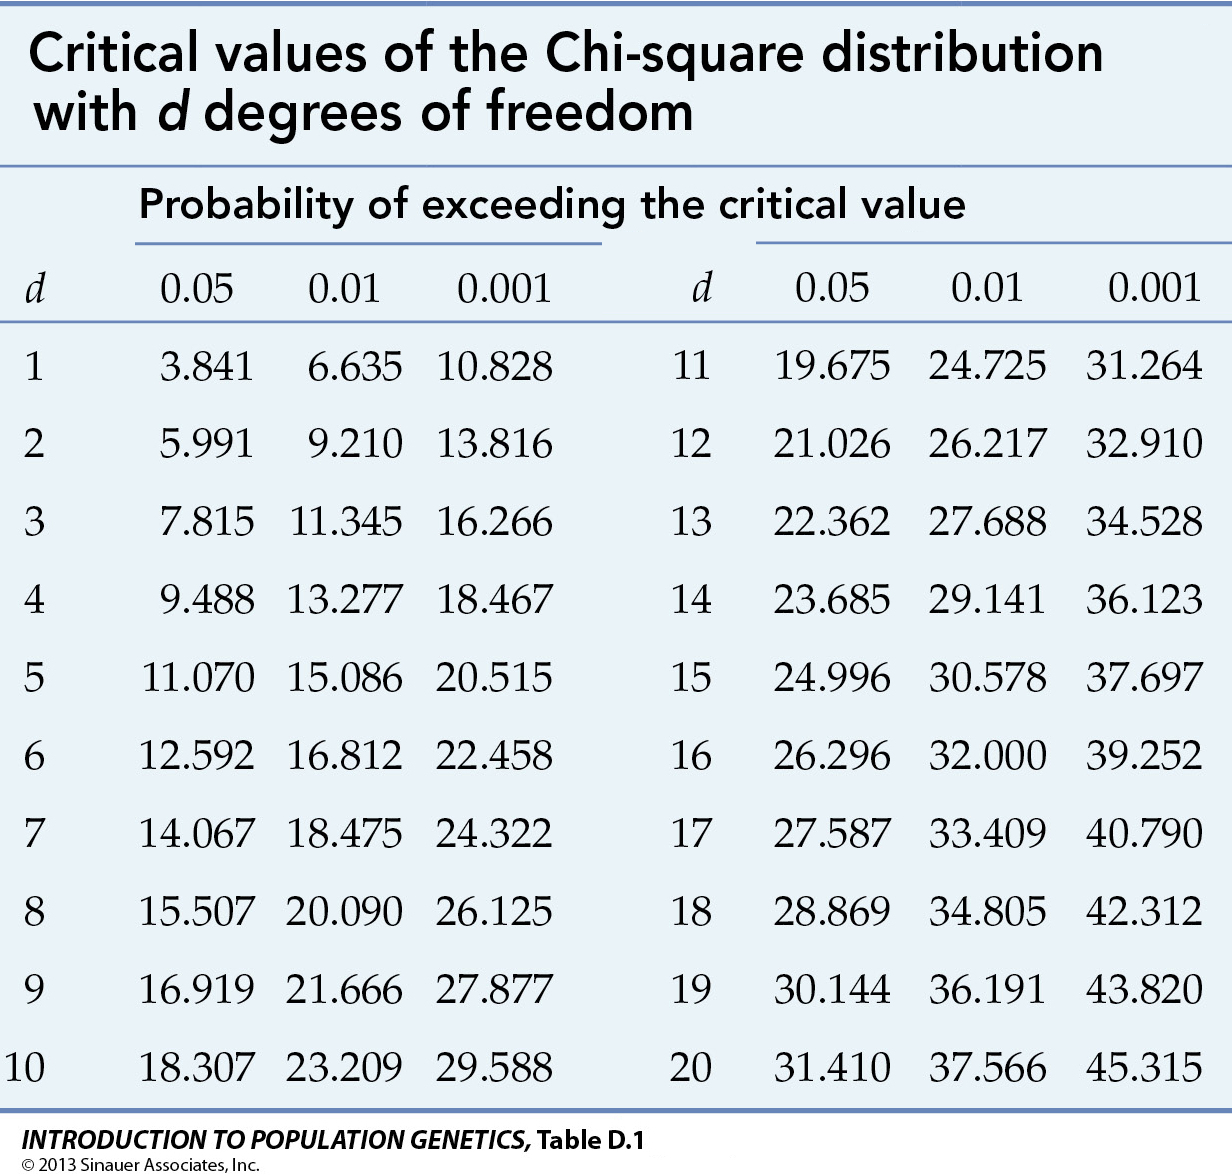

In [29]:
from IPython import display

display.Image("https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg", width=500, height=500)

In [45]:
corr_df_model = data.select_dtypes(exclude=[np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

Empty DataFrame
Columns: []
Index: []

In [108]:
corr_mat = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')

In [109]:
print(corr_mat)

                         age    gender   country  education      role  \
age                 1.000000  0.006567  0.012966   0.001047 -0.009051   
gender              0.006567  1.000000 -0.006631   0.019336  0.021496   
country             0.012966 -0.006631  1.000000   0.112382  0.001089   
education           0.001047  0.019336  0.112382   1.000000 -0.023913   
role               -0.009051  0.021496  0.001089  -0.023913  1.000000   
experience_prog    -0.002292  0.010951 -0.031153  -0.024197  0.014723   
programming_lang_c  0.001060  0.020951 -0.007185   0.022743 -0.039478   
experience_ml       0.021417 -0.037039  0.032790   0.009706  0.050496   
industry            0.005511 -0.019415  0.058009  -0.019545  0.057506   
company_size        0.002011  0.009841  0.008486   0.000880  0.012529   
team_size          -0.009791  0.010309 -0.034435  -0.022322 -0.004681   
salary             -0.007882 -0.055765  0.090056   0.028865 -0.038838   
country_group       0.036122  0.016903  0.409678   

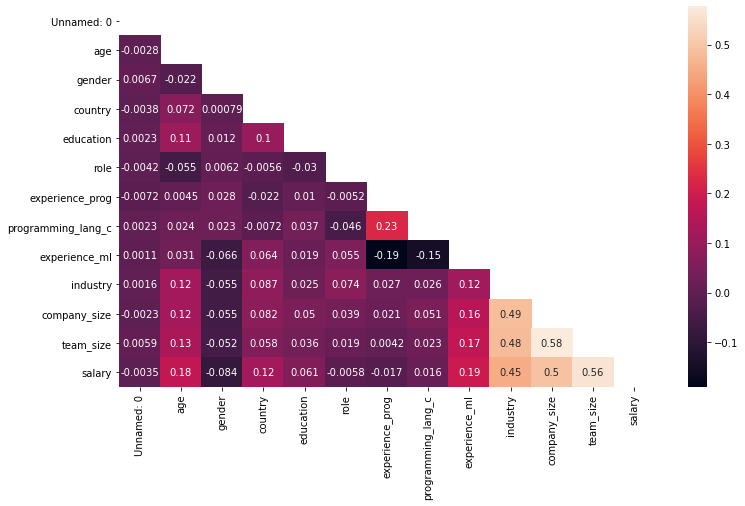

In [52]:
mask = np.zeros_like(corr_mat)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap((corr_mat), mask=mask, annot=True)
plt.show()